# Problem Statement:

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.



# Objective

To predict which customer is more likely to purchase the newly introduced travel package.



# Data Dictionary

**Customer details:**

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:** 

17. PitchSatisfactionScore: Sales pitch satisfaction score
18. ProductPitched: Product pitched by the salesperson
19. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
20. DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import libraries

In [ ]:
!pip install xgboost 

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tourismDf=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ensemble Techniques/Project4/TourismData.csv")
# tourismDf=pd.read_csv("TourismData.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
OriginalDf=tourismDf.copy()

#### Check for duplicates

In [ ]:
tourismDf.duplicated().any()

False

There are no duplicates in the dataset.

### View the first and last 5 rows of the dataset.

In [ ]:
tourismDf.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
tourismDf.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


**Observations:**

`Age`, `DurationOfPitch`, `NUmberOfFollowups`, `PreferredPropertyStar`,`NumberOfTrips`,`NumberOfChildrenVisiting` are are floating point values, it might make the interpretation easier if we change them to integer type. There will be some reduction in space too.

### Understand the shape of the dataset.

In [ ]:
# Get the number of rows and columns
rows = len(tourismDf.axes[0])
cols = len(tourismDf.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 4888
Number of Columns: 20


### Check the data types of the columns for the dataset.

In [ ]:
tourismDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations:**
- We can see that there are total of 20 columns and 4888 rows in the dataset.
- The data type of the columns are either integer, float or object type.
- The are a few columns with null values in this dataset. We can further check using `isna()` method.
- We can convert the object data type to categorical type. `converting "objects" to "category" reduces the data space required to store the dataframe`


In [ ]:
tourismDf.columns[tourismDf.isnull().any()]

Index(['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',
       'MonthlyIncome'],
      dtype='object')

The columns `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`,
       `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`,
       `MonthlyIncome` have null values.

Let us handle them in the next section.

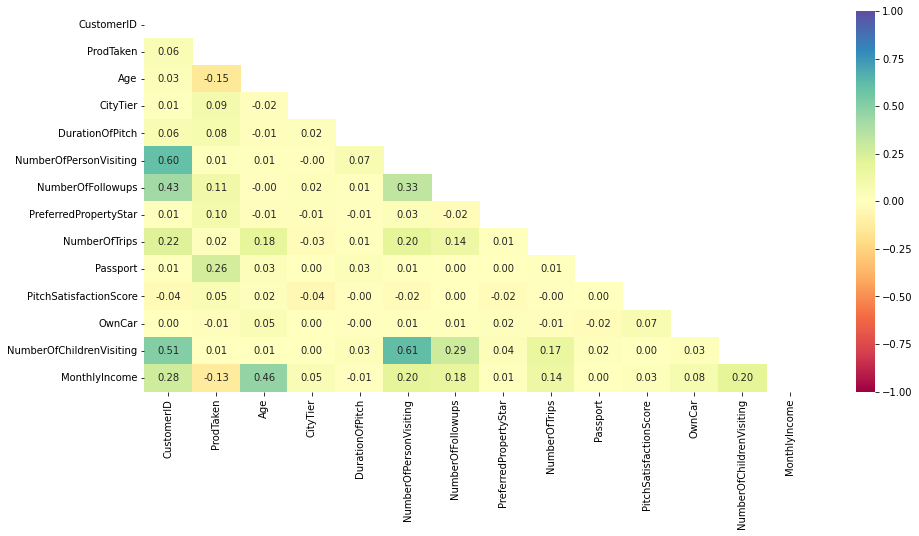

In [ ]:
plt.figure(figsize=(15, 7))
# sns.heatmap(tourismDf.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
# plt.show()

corr= tourismDf.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True,vmin=-1, vmax=1, fmt=".2f", mask=matrix, cmap='Spectral')
plt.show()


***Observations:***
- `ProductTaken` has a positive correlation with `Passport`
- `Age` has a strong correlation with `MonthlyIncome`
- `NumberOfPersonsVisiting` seems to have a strong correlation with
 `NumberOfChildrenVisiting` and `NumberOfFollowups` and slight correlation 
with `NumberOfTrips` and `MonthlyIncome`

## Fixing the data types

In [ ]:
tourismDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

`CustomerID` column does not have any significance on data analysis, so we can drop this column.

In [ ]:
 tourismDf.drop('CustomerID', axis=1, inplace=True)

#### Convert the data type of categorical columns from object to category

In [ ]:
for i in tourismDf.select_dtypes(['object']).columns:
    tourismDf[i] = tourismDf[i].astype('category')
# catColumns = ['ProdTaken','TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','Designation']
# catColumns = ['ProdTaken','TypeofContact','Occupation','CityTier','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar','Designation']
# for i in catColumns:
#     tourismDf[i] = tourismDf[i].astype('category')


In [ ]:
tourismDf.memory_usage().sum()/1024

526.1640625

We can see that the memory usage has decreased from `763.9 KB to 526.2 KB`, this technique is generally useful for bigger datasets.

### Check the unique values of categorical field

#### Passport Field

In [ ]:
tourismDf.Passport.unique()

array([1, 0])

Passport field has two distinct values 0 and 1, and there are no missing values, so this can be converted from integer to a categorical field.

In [ ]:
tourismDf.Passport = tourismDf.Passport.astype('category')

#### OwnCar Field

Similarly `OwnCar` field has two distinct values 0 and 1, so this can be converted into a categorical field.

In [ ]:
tourismDf.OwnCar.unique()

array([1, 0])

In [ ]:
tourismDf.OwnCar = tourismDf.OwnCar.astype('category')

#### PitchSatisfactionScore Field

In [ ]:
tourismDf.PitchSatisfactionScore.unique()

array([2, 3, 5, 4, 1])

Similarly `PitchSatisfactionScore` has finite set of values, we can convert it from integer to categorical type.

In [ ]:
tourismDf.PitchSatisfactionScore = tourismDf.PitchSatisfactionScore.astype('category')

#### Gender Field - Text Processing

In [ ]:
tourismDf.Gender.unique()

['Female', 'Male', 'Fe Male']
Categories (3, object): ['Female', 'Male', 'Fe Male']

In [ ]:
tourismDf.Gender = tourismDf.Gender.str.replace(' ','')
tourismDf.Gender = tourismDf.Gender.str.replace('FeMale','Female')
tourismDf.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
tourismDf.Gender = tourismDf.Gender.astype('category')

Text processing is required on the Gender field as there are spaces and mix of upper case and lower case characters for Female gender.

#### Occupation Field

In [ ]:
tourismDf.Occupation.unique()

['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']

**This data looks good, so we can leave it as it is.**

#### ProductPitched field

In [ ]:
tourismDf.ProductPitched.unique()

['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
Categories (5, object): ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']

#### MaritalStatus Field

In [ ]:
tourismDf.MaritalStatus.unique()

['Single', 'Divorced', 'Married', 'Unmarried']
Categories (4, object): ['Single', 'Divorced', 'Married', 'Unmarried']

#### Designation Field

In [ ]:
tourismDf.Designation.unique()

['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']
Categories (5, object): ['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']

#### TypeOfContact Field

In [ ]:
tourismDf.TypeofContact.unique()

['Self Enquiry', 'Company Invited', NaN]
Categories (2, object): ['Self Enquiry', 'Company Invited']

#### CityTier Field

In [ ]:
tourismDf.CityTier.unique()

array([3, 1, 2])

In [ ]:
tourismDf.CityTier = tourismDf.CityTier.astype('category')

**Observations:**

- Except `Gender` and `TypeOfContact` field, the data looks good on all other fields.
- Extraspace within the word and mix of upper and lower case has been corrected on the Gender Field.
- We can treat the missing values in the `TypeOfContact` field later. 
- Now, all the categorical fields have unique values.

#### NumberOfFollowups Field

In [ ]:
tourismDf.NumberOfFollowups.unique()

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

#### PreferredPropertyStar Field

In [ ]:
tourismDf.PreferredPropertyStar.unique()

array([ 3.,  4.,  5., nan])

In [ ]:
tourismDf.PreferredPropertyStar = tourismDf.PreferredPropertyStar.astype('category')

**Observations:**

- Except `Gender`,`TypeOfContact`,`NumberOfFollowups` and `PreferredPropertyStar` field, the data looks good on all other fields.
- Extraspace within the word and mix of upper and lower case has been corrected on the Gender Field.
- We can treat the missing values in the `TypeOfContact`,`NumberOfFollowups` and `PreferredPropertyStar` field later. 
- Now, all the categorical fields have unique values.

### Summary of the dataset.

In [ ]:
tourismDf.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


**Observations on continuous values:**
- Median `Age` of the people in this data set is 36 years, ranging from people as young as 18 years and as old as 61 years.
- `DurationOfPitch` has a minimum value of 5 and a max value of 127, wich clearly indicates there are outliers in the data. We can futher investigate this data.
- `NumberOfPersonVisiting` range from 1 to 5, with the median value being 3.
- `NumberOfChildrenVisiting` number of children less than 5 years old who are visiting the trip with the customer range from 0 to 3 with the median value being 1. Maximum number of children under 5 who visit the trip with cutomer is 3.
- `MonhlyIncome` the average monthly income of the customers is 23K per month and the median income is 22K where as max monthly income is 98K and the min monthly income is 1K. It is possible there are outliers in this data, let us check further in our next steps and see how we can treat them.

In [ ]:
tourismDf.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478
OwnCar,4888,2,1,3032


In [ ]:
tourismDf.Designation.unique()

['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']
Categories (5, object): ['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']

**Observations on categorical values:**

- `TypeofContact` Most of the customers came through self enquiry, there are two unique values 'Self Enquiry' and 'Company Invited'
- `CityTier` Most of the customers come from Tier 1 cities, there are 3 unique values 1,2 and 3.
- `Occupation` Most of the customers are salaried. There are 4 unique occupation types 'Salaried', 'Free Lancer', 'Small Business', 'Large Business'
- `Gender` Most of the customers are Male. There are two unique vaues in this field; 'Male' and 'Female'.
- `NumberOfFollowups` Maximum number of followups made by a sales person after a sales pitch of a product to a customer is 4 times. Values range from 1 to 6.
- `ProductPtched` most of the product that are pitched are of type 'Basic', there are 5 unique type of products; 'Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'.
- `PreferredPropertyStar` most of the customers prefer 3 star hotel rating, there are 3 different hotel ratings 3,4 and 5.
- `MaritalStatus` Most of the customers are Married, there are 4 unique marital status values; 'Single', 'Divorced', 'Married', 'Unmarried'
- `Passport` Most of the customers do not have a passport, there are 2 unique values in this field 1 => has passport, 0=> do not hold a passport.
- `OwnCar` Most of the customers own a car, there are two unique values in this field 1 => own a car and 0=> does not own a car.
- `Designation` Most of the cutomers come from Executive level work. Customers come from different designation levels like 'Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'.

In [ ]:
tourismDf.corr()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.078257,0.009627,0.112171,0.018898,0.007421,-0.130585
Age,-0.147254,1.000000,-0.012063,0.011621,-0.002577,0.184905,0.007370,0.464869
DurationOfPitch,0.078257,-0.012063,1.000000,0.065141,0.009434,0.009715,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,0.065141,1.000000,0.328569,0.195223,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.009434,0.328569,1.000000,0.139517,0.286425,0.176503
NumberOfTrips,0.018898,0.184905,0.009715,0.195223,0.139517,1.000000,0.168795,0.139105
NumberOfChildrenVisiting,0.007421,0.007370,0.031408,0.610621,0.286425,0.168795,1.000000,0.201643
MonthlyIncome,-0.130585,0.464869,-0.006252,0.195134,0.176503,0.139105,0.201643,1.000000


**Observations on correlation of data:**
- `Age` and `MonthlyIncome` are negatively correlated with Product taken.
- `Durationofpitch` has a slightlly positive correlation with ProductTaken, `NUmberOfPersonVisiting` and `NumberOfChildrenVisiting`.
- `MonthlyIncome` has a strong correlation with Age and slight positive correlation with `NumberOfPersonVisiting`, `NumberOfTrips` and `NumberOfChildrenVisiting`.


# Exploratory Data Analysis

## Univariate Analysis

#### Functions for creating graphs and charts

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on ProdTaken

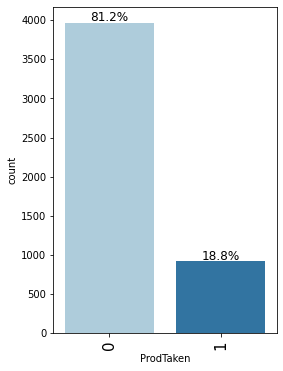

In [ ]:
labeled_barplot(tourismDf,'ProdTaken', perc=True)

**18.8% of the customers have purchased a travel package from the company 'Visit with us' while 81.2% of them have not purchased the travel package.**

### Observations on Age

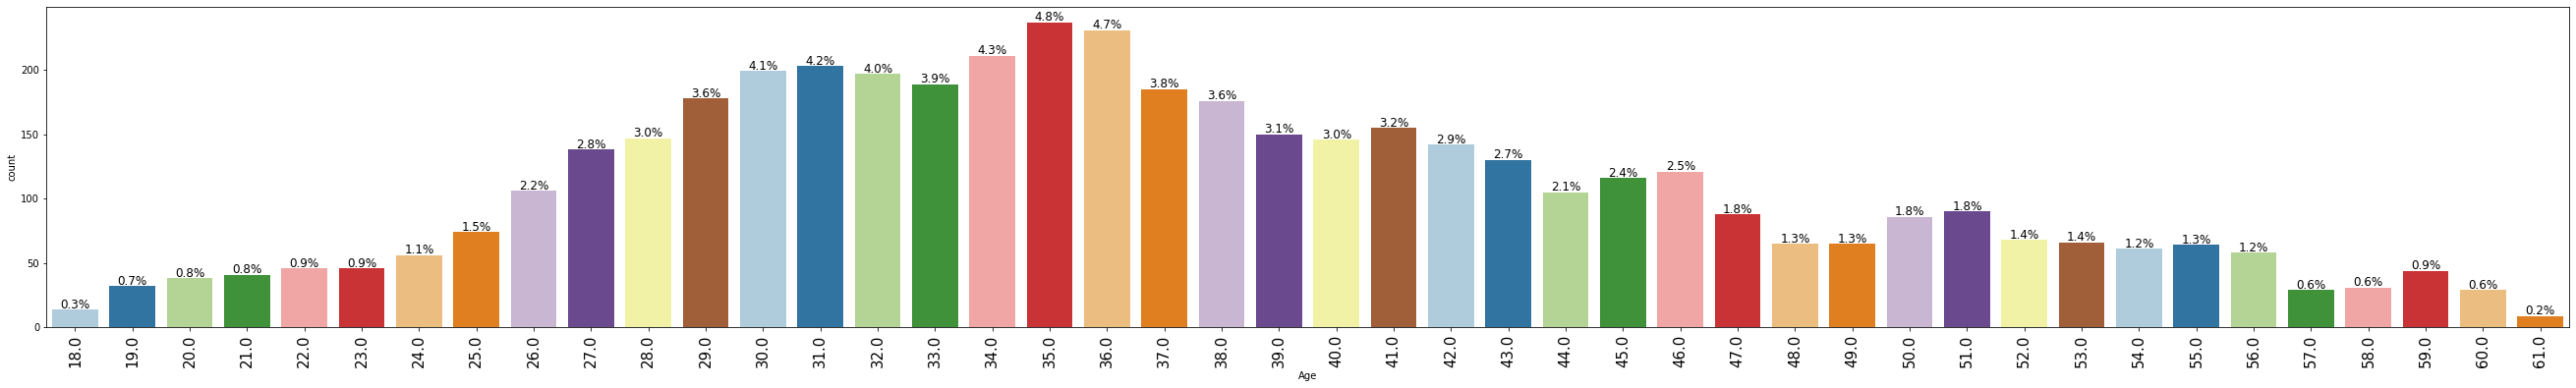

In [ ]:
labeled_barplot(tourismDf,'Age', perc=True)

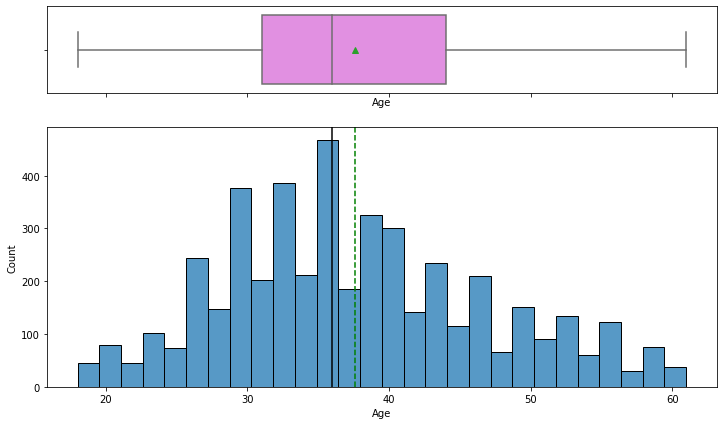

In [ ]:
histogram_boxplot(tourismDf,'Age')

- Median Age of the customer is slightly less than the mean and the data is slightly skewed to the right.
- Median `Age` of the people in this data set is 36 years, ranging from people as young as 18 years and as old as 61 years.

### Observations on TypeofContact

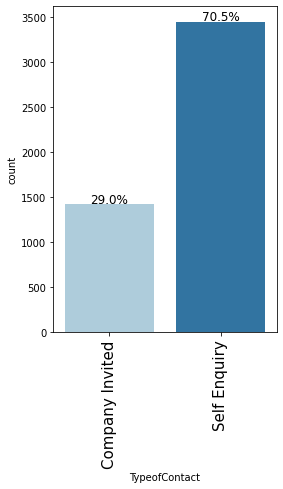

In [ ]:
labeled_barplot(tourismDf,'TypeofContact', perc=True)

- 70.5% of the customers came through self enquiry where are 29.0% of them are company invited.

### Observations on CityTier

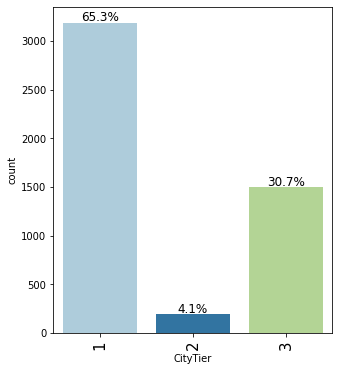

In [ ]:
labeled_barplot(tourismDf,'CityTier', perc=True)

- 65.3% of the customers come from Tier 1 cities, 30.7% of them come from Tier 3 cities and 4.1% of them are from Tier 2 cities.

### Observations on DurationOfPitch

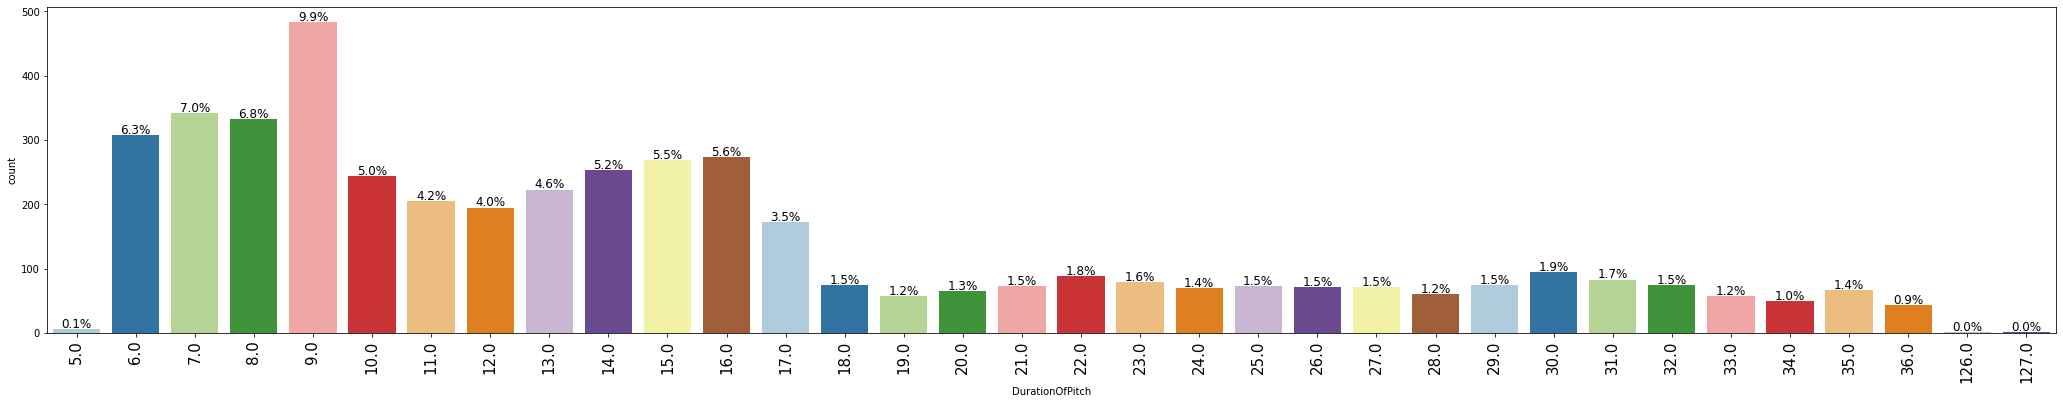

In [ ]:
labeled_barplot(tourismDf,'DurationOfPitch', perc=True)

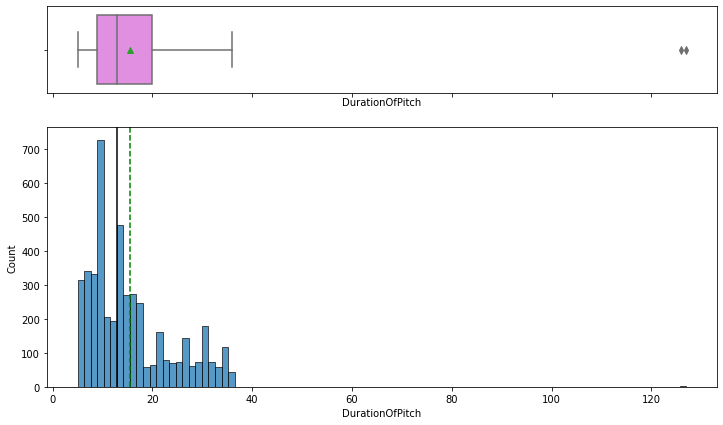

In [ ]:
histogram_boxplot(tourismDf,'DurationOfPitch')

**Observations:**

* `DurationOfPitch` is skewed more to the right, but there are only a few outliers.
* Duration will vary depending on the customer so it is perfectly fine not to treat this outlier. Also, since we are dealing with only a few records, in realtime there will be millions of records and the data will look more balanced when there are more records.

### Observations on Occupation

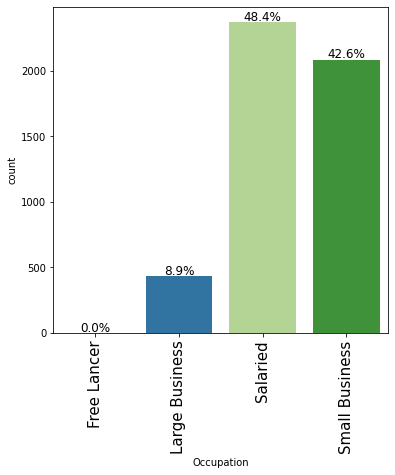

In [ ]:
labeled_barplot(tourismDf,'Occupation', perc=True)

In [ ]:
tourismDf.Occupation.value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

- 48.4% of the customers are Salaried.
- 42.6% of them are Small Business owners.
- 8.9% of them are Large Business Owners.
- 2 of them out of 4888 obesrved customers are Freelancers, so it is hard to predict, customers of this category in this data set, it can be considered as outlier, but since the decission tree does not have any impact due to this I am choosing to leave it as it is.
- In production data where the number of samples are high, it may be good to keep consider having this value.

### Observations on Gender

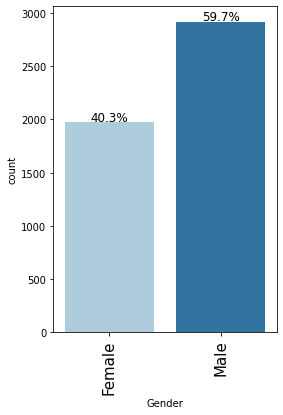

In [ ]:
labeled_barplot(tourismDf,'Gender', perc=True)

- 59.7% of them are Male customers
- 40.3% of them are female customers.

### Observations on NumberOfPersonVisiting

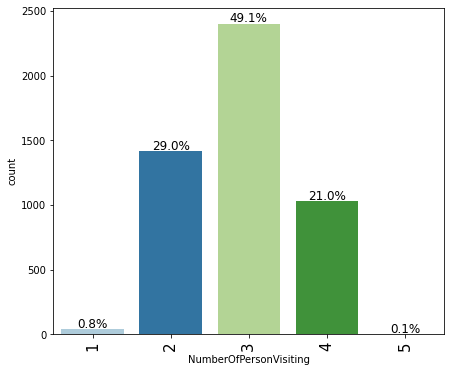

In [ ]:
labeled_barplot(tourismDf,'NumberOfPersonVisiting', perc=True)

- 49.1% of the customers plan to take the trip as a group of 3 people
- 21% of them plan to take the trip as a group of 4 people.
- 29% of them plan to take the trip as couple and .8% of them plan to go single.

### Observations on NumberOfFollowups

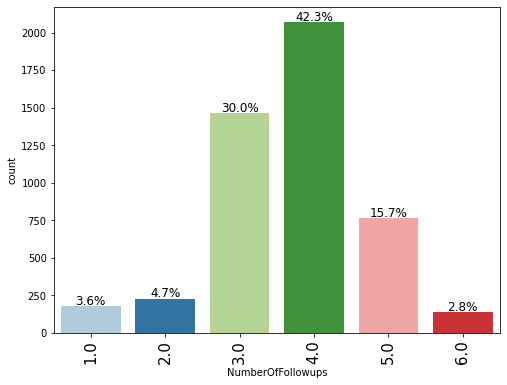

In [ ]:
labeled_barplot(tourismDf,'NumberOfFollowups', perc=True)

**Observations:**

The highest number of followups is 4.0 followed by 3.0. 

### Observations on ProductPitched

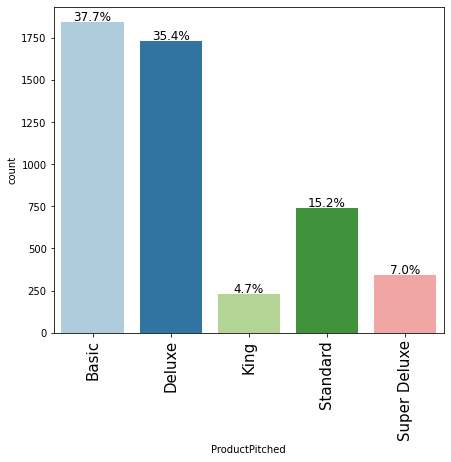

In [ ]:
labeled_barplot(tourismDf,'ProductPitched',perc=True)

**Observations:**

1. Basic(37.7%) and Deluxe(35.4%) are the most popular travel packages. 
2. The next slightly popular one is the Standard Travel package at 15.2%.

### Observations on PreferredPropertyStar

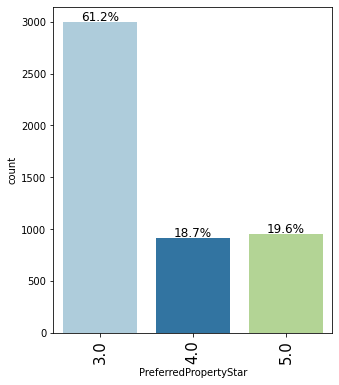

In [ ]:
labeled_barplot(tourismDf,'PreferredPropertyStar',perc=True)

**Observations:**

61.2% customers prefer a three star hotel rating compared to four (18.7%) and five (19.6%) star rating hotels

### Observations on MaritalStatus

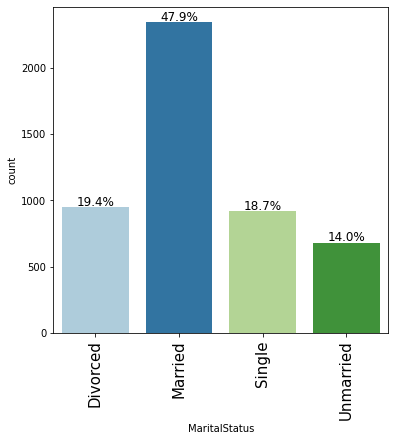

In [ ]:
labeled_barplot(tourismDf,'MaritalStatus', perc=True)

**Observations:**

1. Married customers form the bulk of the data at 47.9%.
2. Divorced (19.4%) and Single (18.7%) coming in close at second and third place. 
3. Unmarried customers with partners form 14% of the data.

### Observations on NumberOfTrips

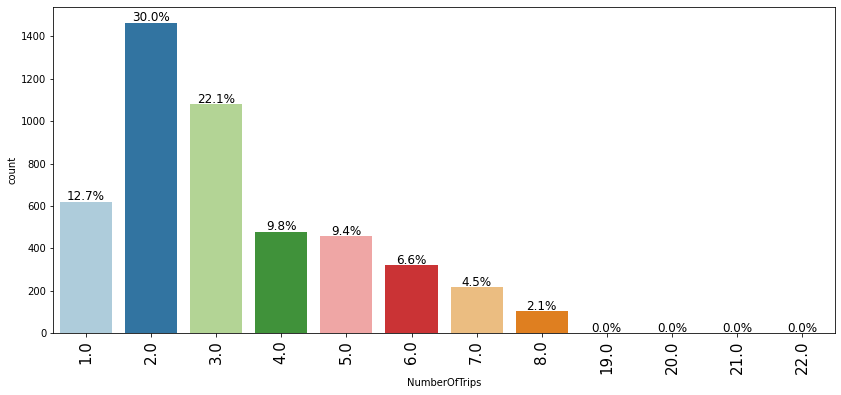

In [ ]:
labeled_barplot(tourismDf,'NumberOfTrips', perc=True)

**Observations:**

1. NumberofTrips is right-skewed a little and majority of the customers seem to take at least 2 trips per year. 
2. We also see very few outliers in the higher end.

In [ ]:
tourismDf.NumberOfTrips.value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64

### Observations on Passport

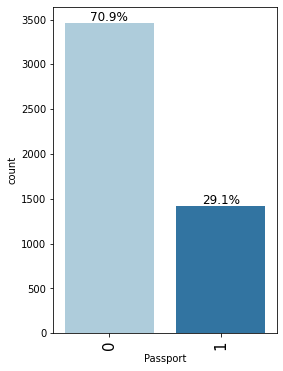

In [ ]:
labeled_barplot(tourismDf,'Passport', perc=True)

**Observations:**

Only 29.1% of customers have a passport

### Observations on PitchSatisfactionScore

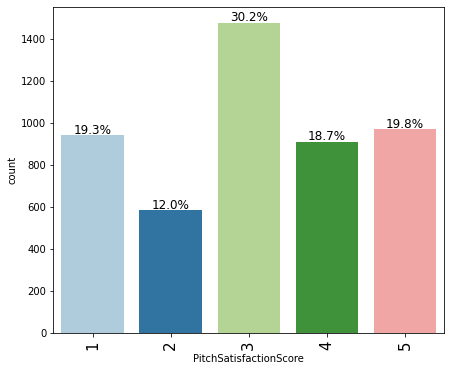

In [ ]:
labeled_barplot(tourismDf,'PitchSatisfactionScore', perc=True)

**Observations:**

1. Only 30.2% of customers rated the Sales Pitch with a score of 3. 
2. Even though 18.7% customers rated at 4.
3. 19.8% rated a pitch score of 5.
4. we also see that 19.3% rated the Sales pitch score at 1. 
5. This shows a need for improvement in this area.

### Observations on OwnCar

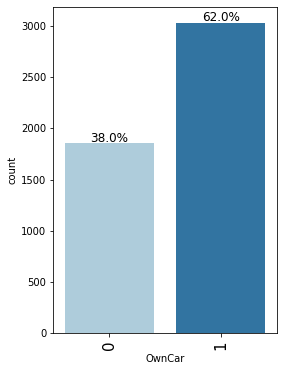

In [ ]:
labeled_barplot(tourismDf,'OwnCar', perc=True)

**Observations:**

62% Customers have their own cars

### Observations on NumberOfChildrenVisiting

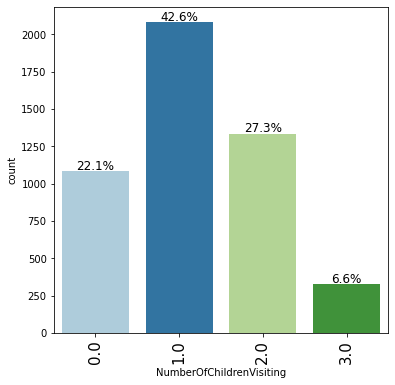

In [ ]:
labeled_barplot(tourismDf,'NumberOfChildrenVisiting', perc=True)

**Observations:**

Around 43.9% of customers have at least one child under age Five are planning to accompany them in the travels.

### Observations on Designation

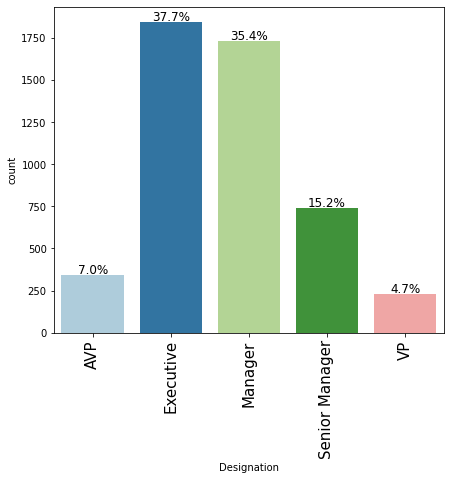

In [ ]:
labeled_barplot(tourismDf,'Designation', perc=True)

**Observations:**

Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset.

### Observations on MonthlyIncome

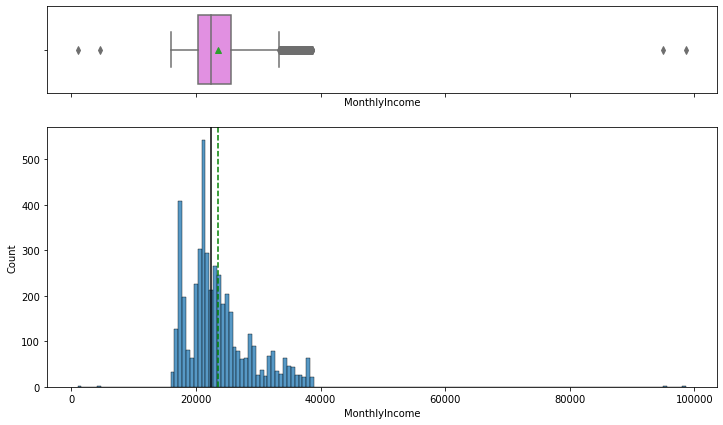

In [ ]:
histogram_boxplot(tourismDf,'MonthlyIncome')

**Observation:**

1. MonthlyIncome is right-skewd. 
2. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. 
3. We also see two outliers in the low end and on the highest end. 
4. There are several outliers after the approx 35K dollars income level.

## Bivariate Analysis

###Correlation Matrix

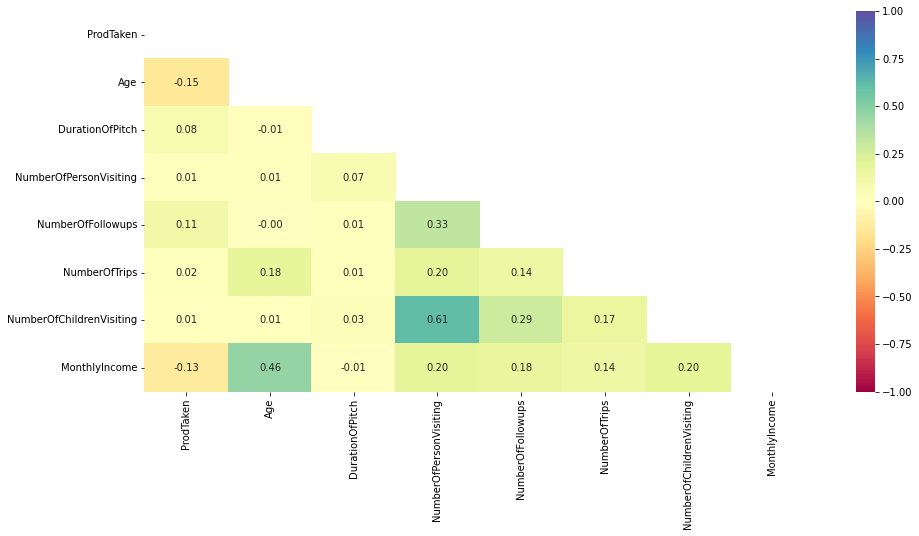

In [ ]:
plt.figure(figsize=(15, 7))
# sns.heatmap(tourismDf.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
# plt.show()

corr= tourismDf.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True,vmin=-1, vmax=1, fmt=".2f", mask=matrix, cmap='Spectral')
plt.show()


**Observations - TODO:**
* **Age and Experience** are highly correlated with each other but they are negatively correlated with Personal_Loan, similarly with other columns. 
* **Income** has a positive correlation with CCAvg and Personal_Loan, people who have more income spend more using credit card and more likely to accept a personal loan.
* **ZIPCode** has a negative correlation with Personal_Loan and very slight positive correlation with CDAccount, Online,CreditCard and family.
* **Family** size is very slightly correlated with Personal_Loan and Education. Does not show a strong correlation with any of the fields.
* Customers who have a **CD_Account, SecuritiesAccount** with AllLife Bank and outside bank's credit card other than AllLife bank are likely to accept a personal loan.
* Customers having **CD_Account** are the only ones who are using **Online** (Internet) banking.

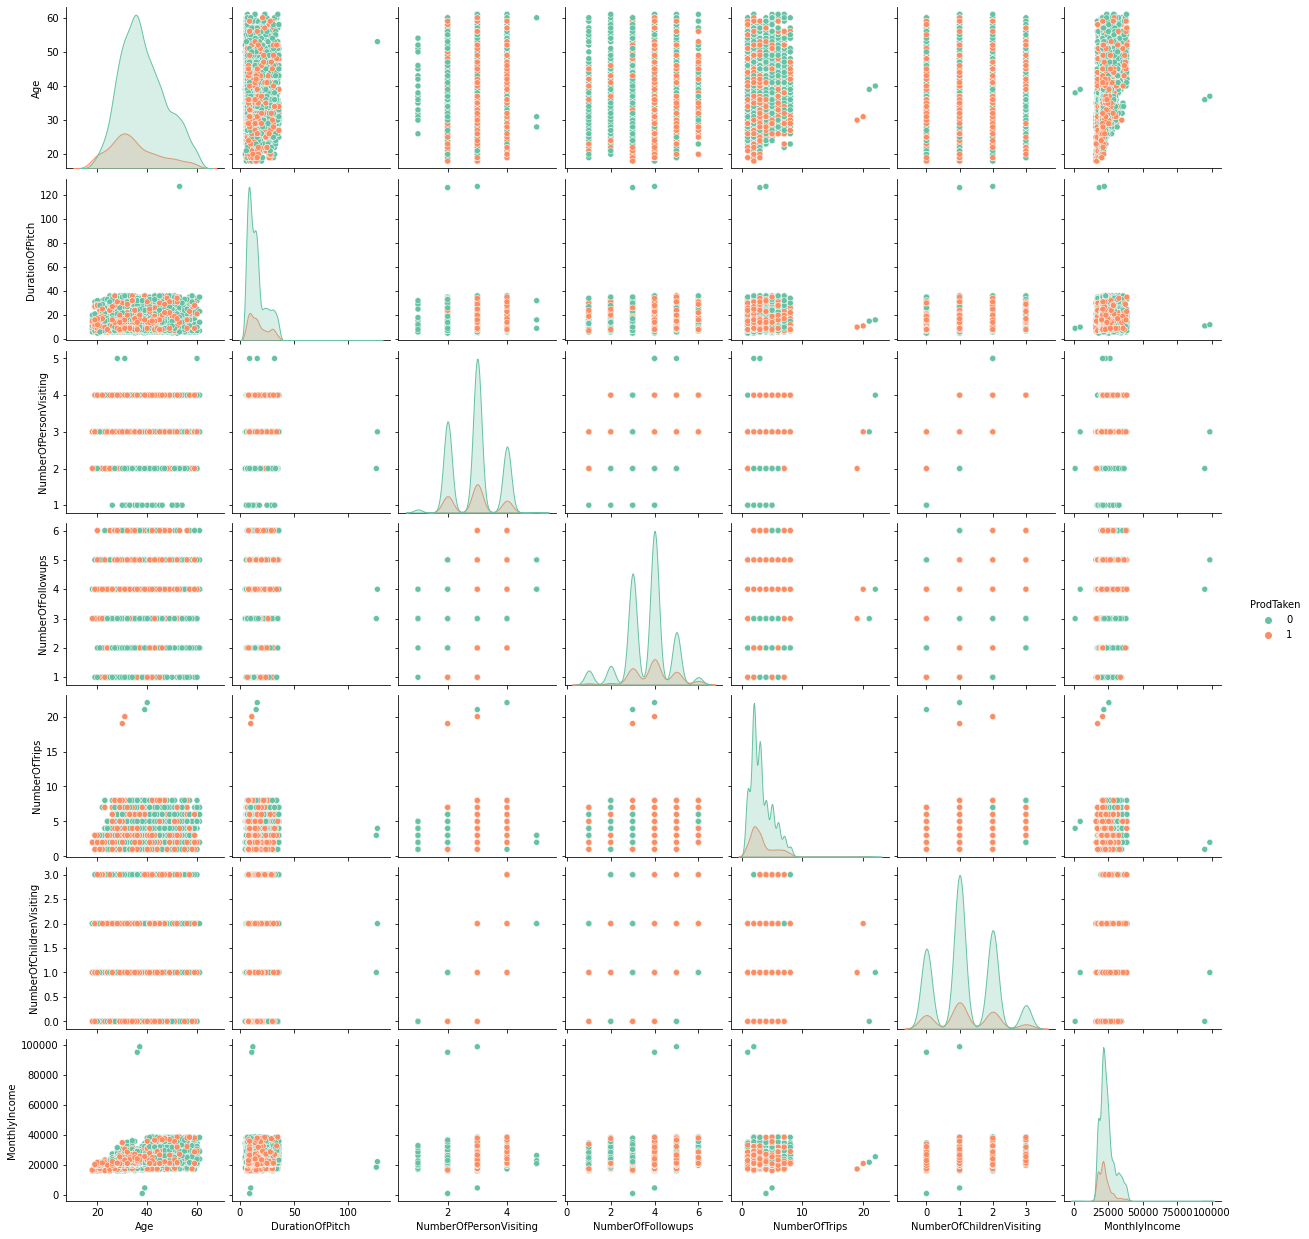

In [ ]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(tourismDf, hue="ProdTaken",corner=False)
plt.show()

* Data is kind of scattered.

### Functions to plot charts

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### ProductTaken vs Age

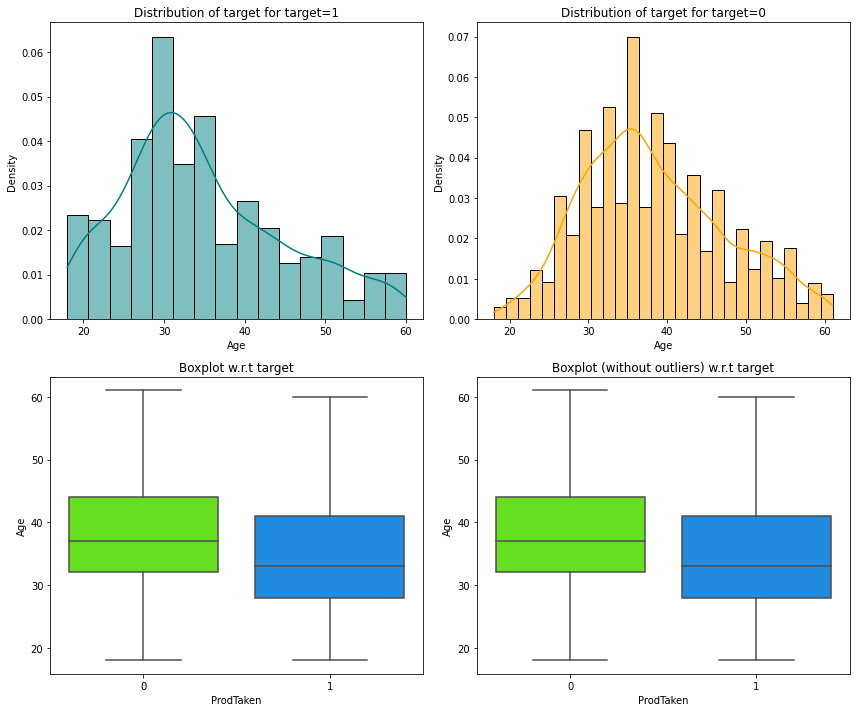

In [ ]:
distribution_plot_wrt_target(tourismDf, "Age", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 45, customers who bought the travel package and those who did not purchase a travel package are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs TypeOfContact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


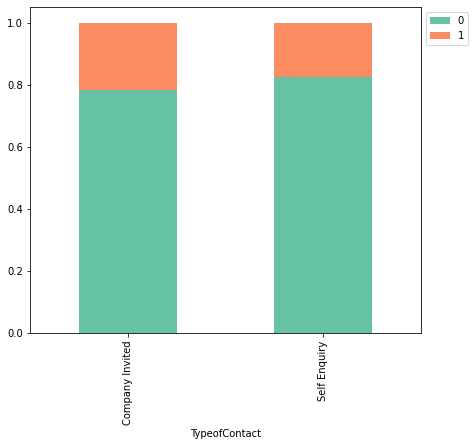

In [ ]:
stacked_barplot(tourismDf, "TypeofContact", "ProdTaken")

**Observations:**

More Customers who came through "Company Invited" contact have bought Travel Package when compared to Customers who came through "Self Enquiry".

### ProductTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


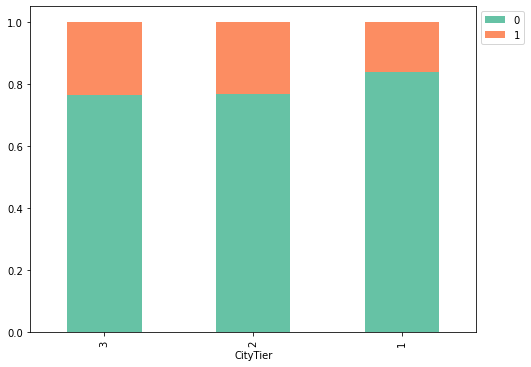

In [ ]:
stacked_barplot(tourismDf, "CityTier", "ProdTaken")

**Observations:**

More Customers from Tier 2 and 3 cities have purchased Travel Packages.

### ProductTaken vs DurationOfPitch

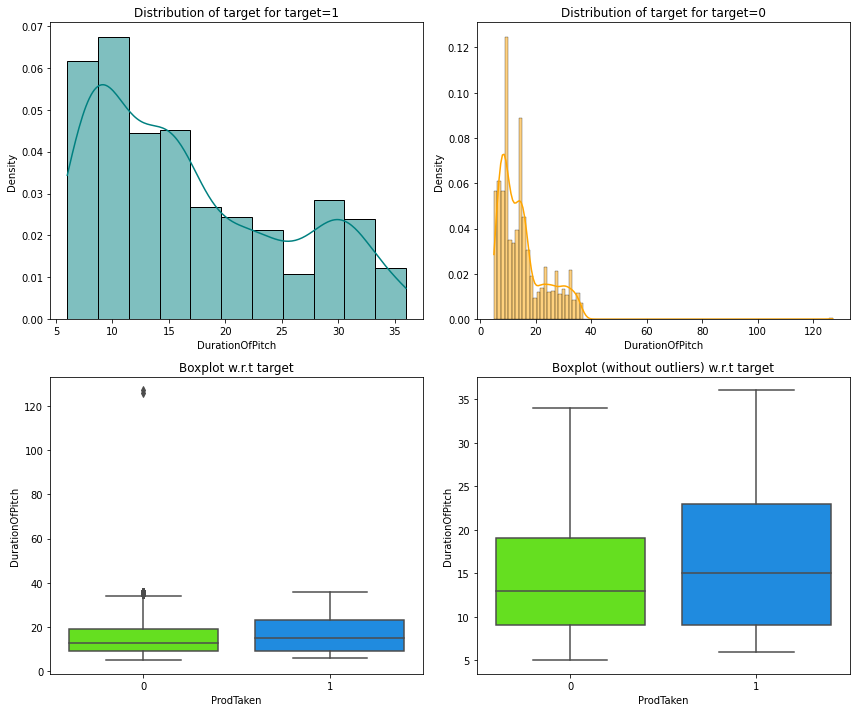

In [ ]:
distribution_plot_wrt_target(tourismDf, "DurationOfPitch", "ProdTaken")

**Observations:**

1. Customers are more likely to take the travel package if the duration of pitch is between 10 and 20 minutes.
2. There are a couple of outliers where the duration of pitch is above 100 minutes.

### ProductTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


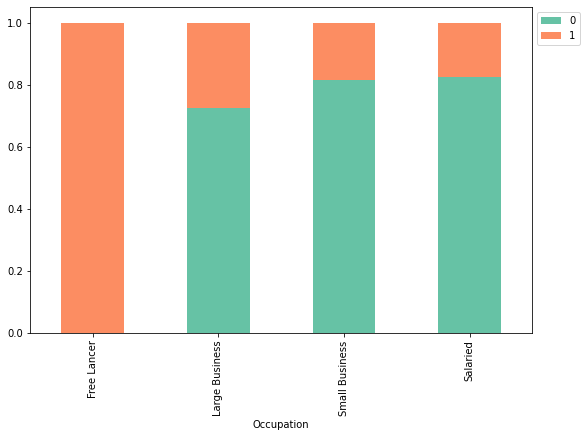

In [ ]:
stacked_barplot(tourismDf, "Occupation", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs Gender

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


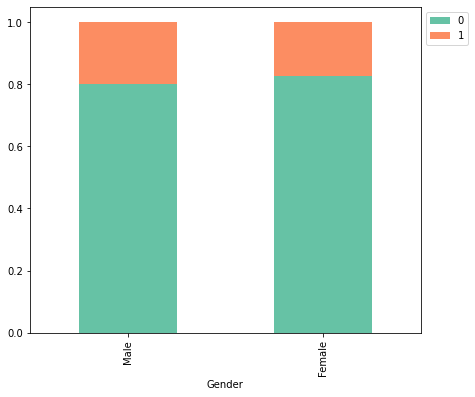

In [ ]:
stacked_barplot(tourismDf, "Gender", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs NumberOfPersonVisiting

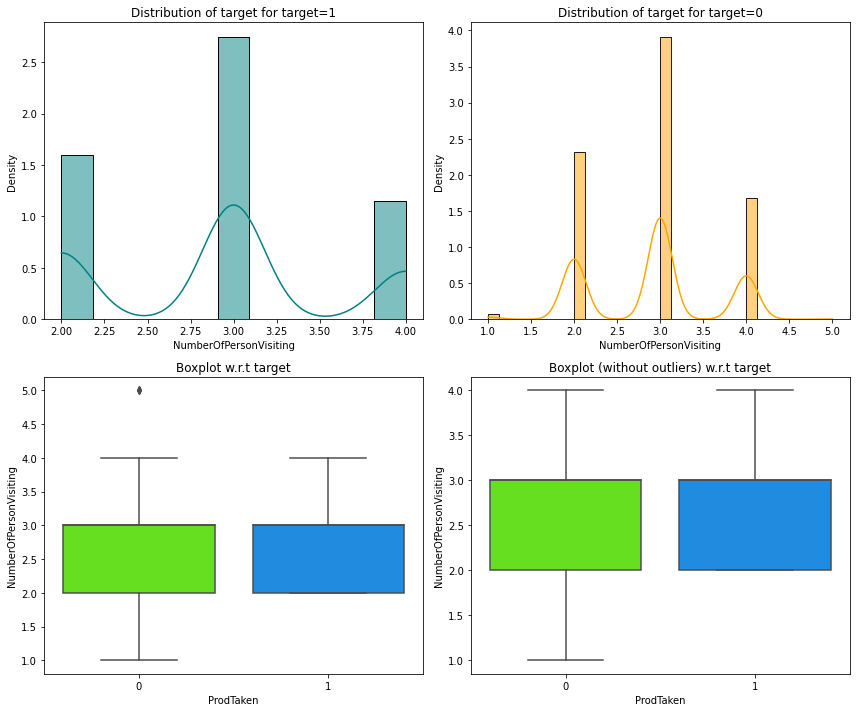

In [ ]:
distribution_plot_wrt_target(tourismDf, "NumberOfPersonVisiting", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs NumberOfFollowups

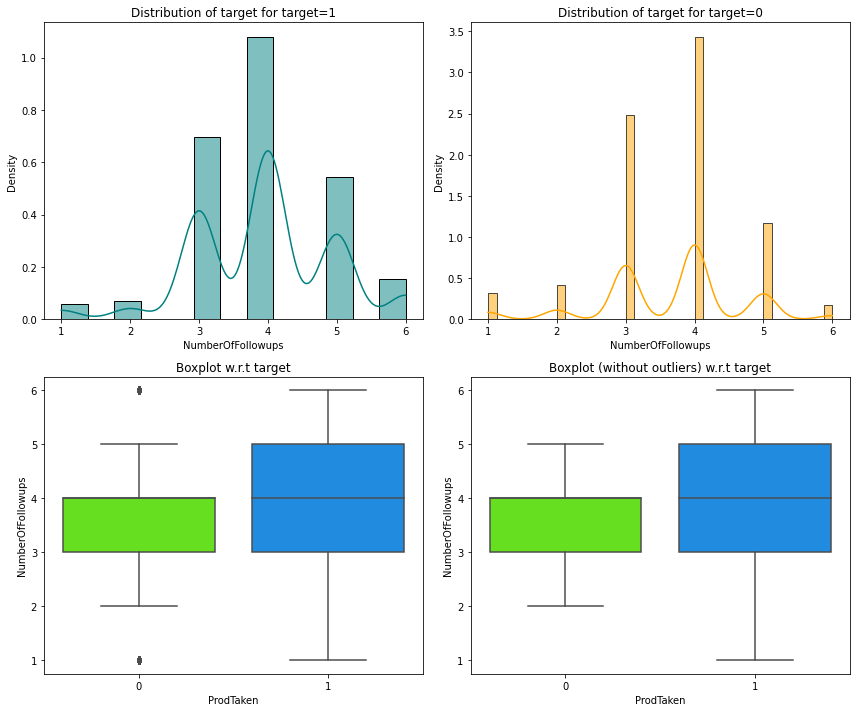

In [ ]:
distribution_plot_wrt_target(tourismDf, "NumberOfFollowups", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs ProductPitched - TODO

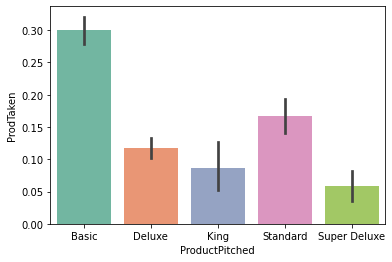

In [ ]:
# sns.violinplot(data = tourismDf, x = 'ProductPitched', y = 'ProdTaken', kind="hex");
# sns.lineplot(data = tourismDf, x = 'ProductPitched', y = 'ProdTaken');
sns.barplot(data = tourismDf, x = 'ProductPitched', y = 'ProdTaken');

**Observations:**

1. The Basic Package is the most preferred 
2. Standard and Deluxe are following.
3. Very few customers purchased Super Deluxe products.

### ProductTaken vs PreferredPropertyStar

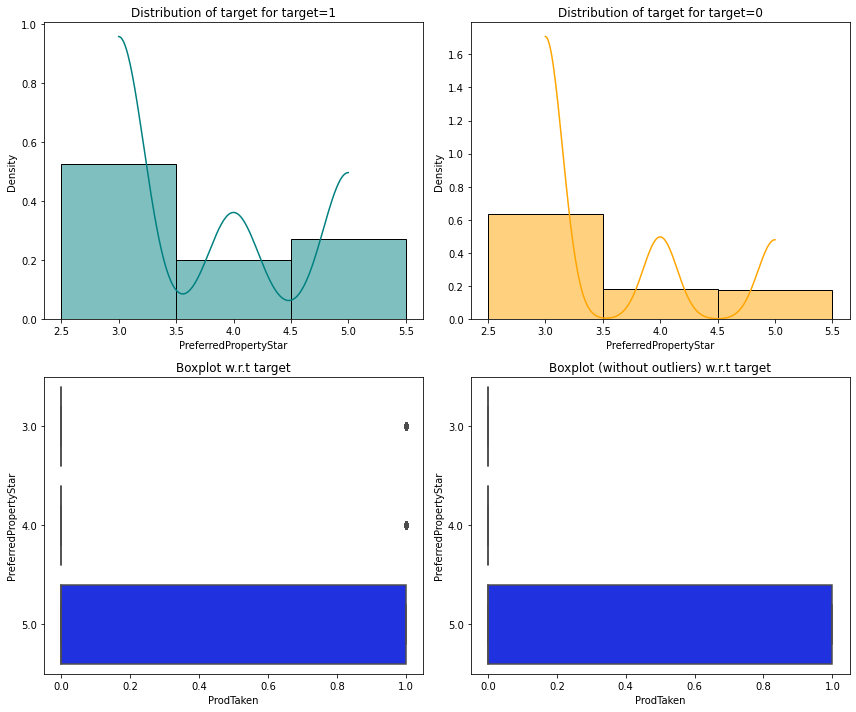

In [ ]:
distribution_plot_wrt_target(tourismDf, "PreferredPropertyStar", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


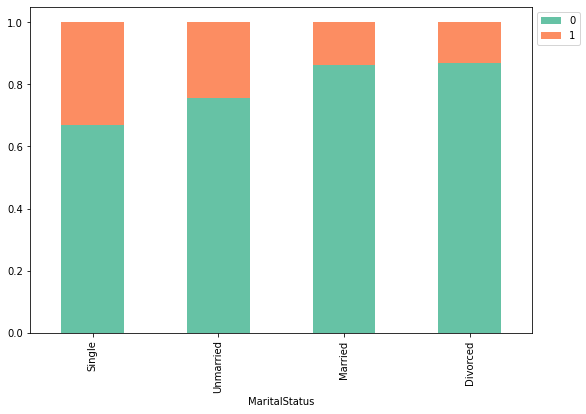

In [ ]:
stacked_barplot(tourismDf, "MaritalStatus", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs NumberOfTrips

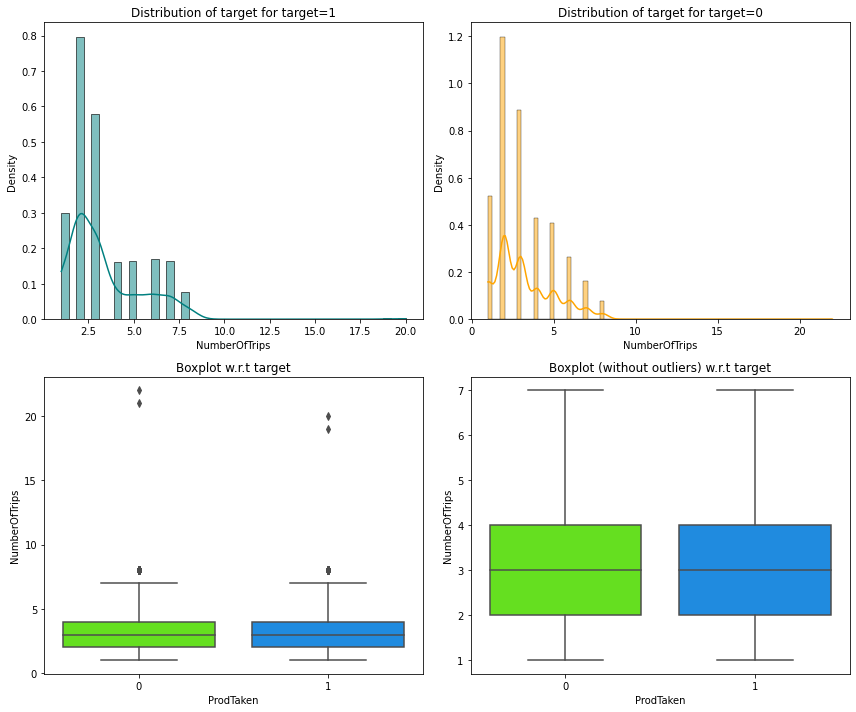

In [ ]:
distribution_plot_wrt_target(tourismDf, "NumberOfTrips", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


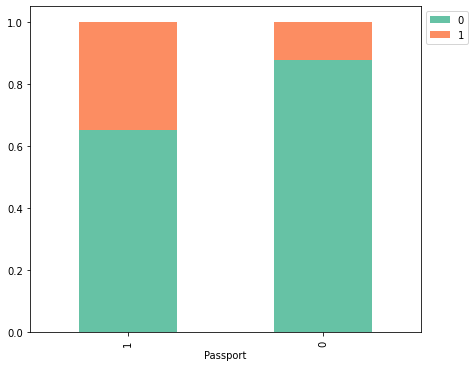

In [ ]:
stacked_barplot(tourismDf, "Passport", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs PitchSatisfactionScore

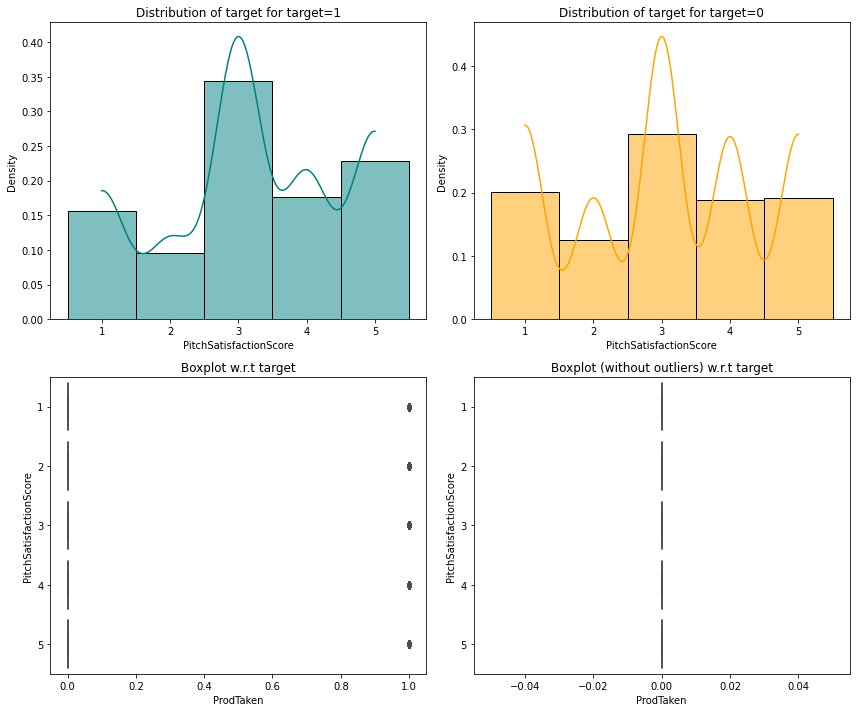

In [ ]:
distribution_plot_wrt_target(tourismDf, "PitchSatisfactionScore", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


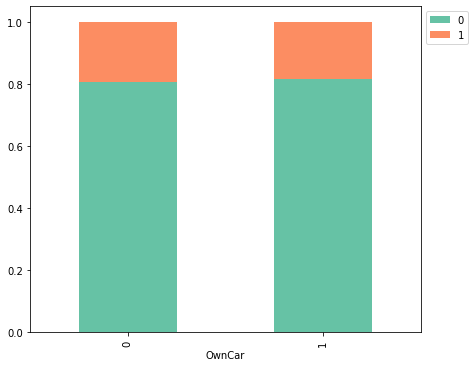

In [ ]:
stacked_barplot(tourismDf, "OwnCar", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs NumberOfChildrenVisiting

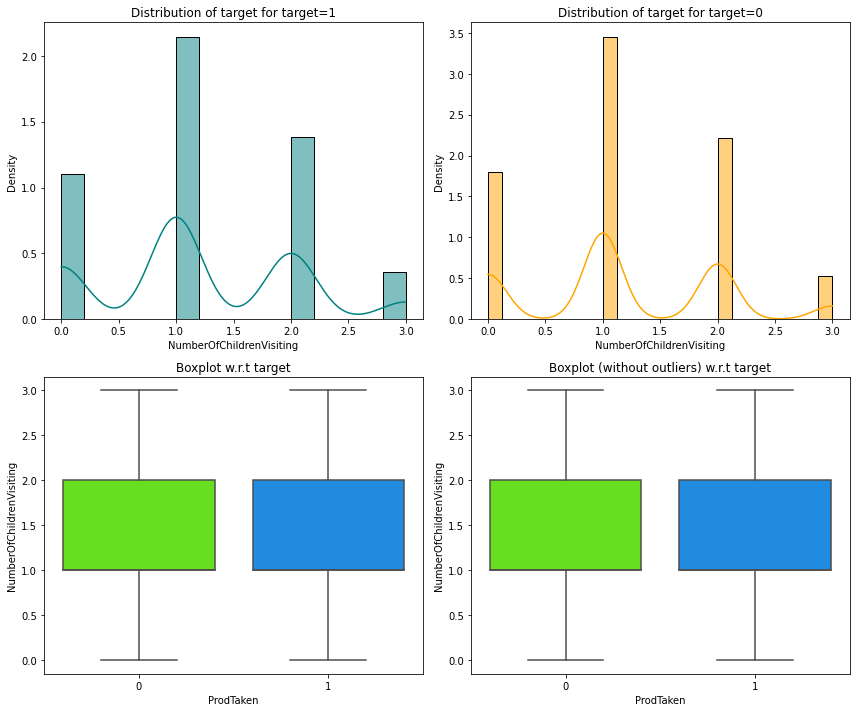

In [ ]:
distribution_plot_wrt_target(tourismDf, "NumberOfChildrenVisiting", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


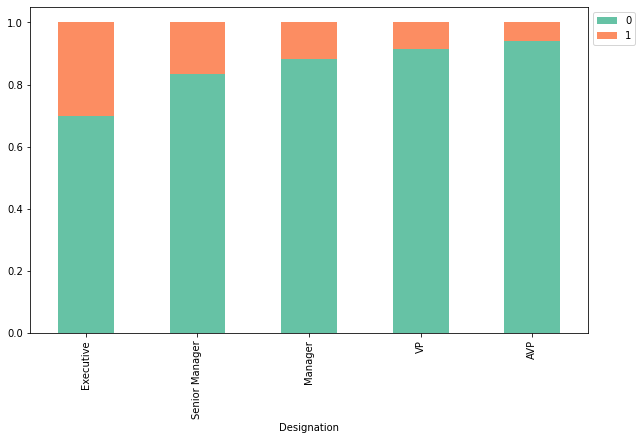

In [ ]:
stacked_barplot(tourismDf, "Designation", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### ProductTaken vs MonthlyIncome

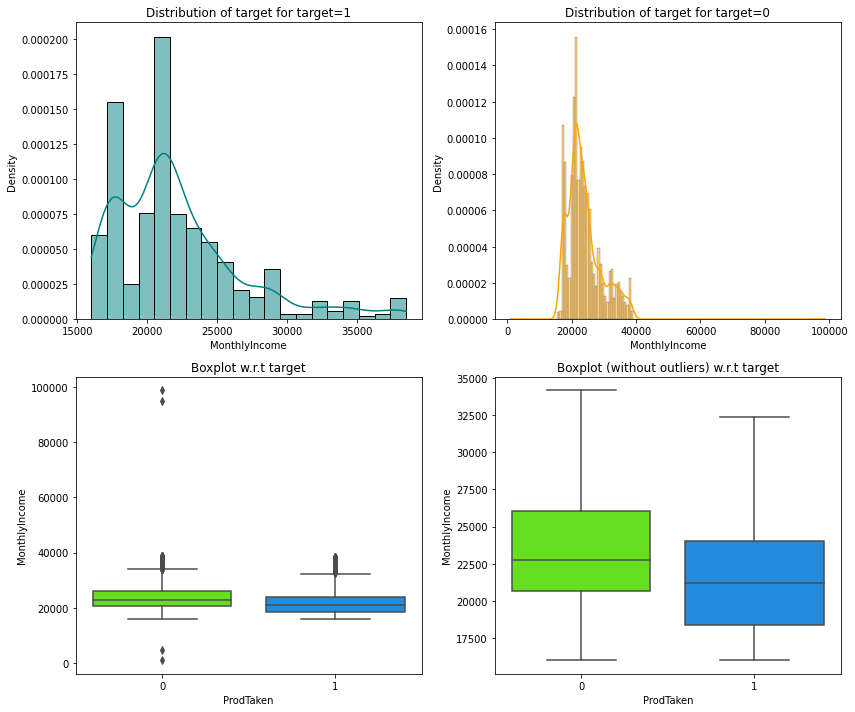

In [ ]:
distribution_plot_wrt_target(tourismDf, "MonthlyIncome", "ProdTaken")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

## Feature Engineering

## Outliers Treatment

### Lets check the percentage of Outliers with IQR

In [ ]:
outlier_num = tourismDf.select_dtypes(include=np.number)

# find the 25th percentile and 75th percentile.
Q1 = tourismDf.quantile(0.25)            
Q3 = tourismDf.quantile(0.75)

# Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1                           

# find lower and upper bounds for all values. All values outside these bounds are outliers
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((outlier_num<lower)|(outlier_num>upper)).sum()/len(tourismDf)*100

ProdTaken                   18.821604
Age                          0.000000
DurationOfPitch              0.040917
NumberOfPersonVisiting       0.061375
NumberOfFollowups            6.382979
NumberOfTrips                2.229951
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.058101
dtype: float64

**Observations:**

1. MonthlyIncome and NumberOfFollowups have high outliers.
2. DurationOfPitch and NumberOfTrips also have few outliers.
3. ProductTaken is the target variable, it is not valid here for outlier treatment.
4. Since we are building DecisionTree Based models and they are not influenced by Outliers, we can choose either choose to treat or not to treat.
5. I am choosing to treat these outliers.

#### Handling Outliers in MonthlyIncome Data

##### Detecting outliers using box plot

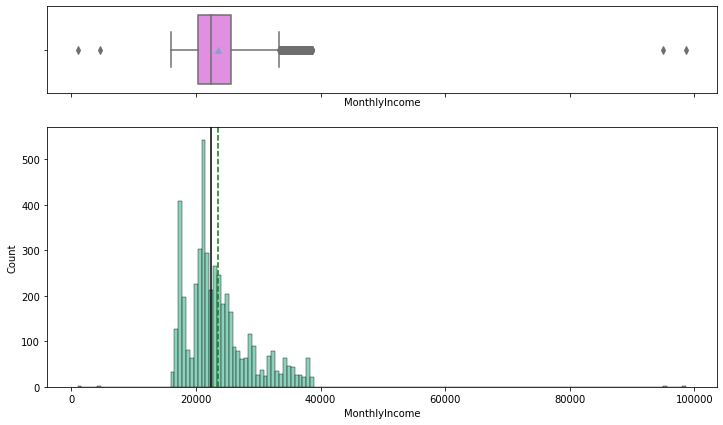

In [ ]:
histogram_boxplot(tourismDf,'MonthlyIncome')

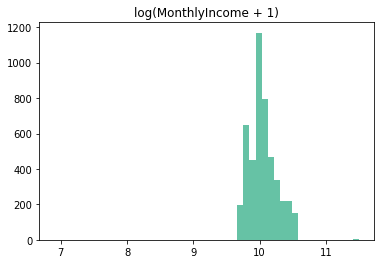

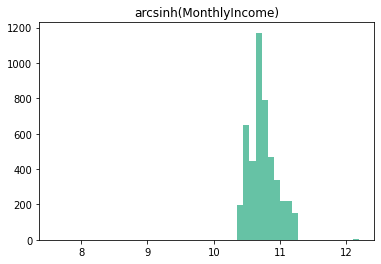

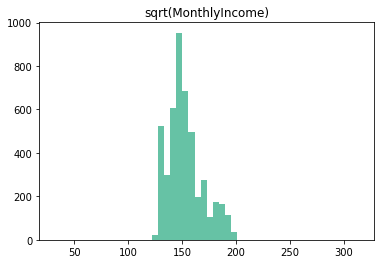

In [ ]:
plt.hist(np.log(tourismDf['MonthlyIncome'] + 1), 50)
plt.title('log(MonthlyIncome + 1)')
plt.show()
plt.hist(np.arcsinh(tourismDf['MonthlyIncome']), 50)
plt.title('arcsinh(MonthlyIncome)')
plt.show()
plt.hist(np.sqrt(tourismDf['MonthlyIncome']), 50)
plt.title('sqrt(MonthlyIncome)')
plt.show()

The log transformation decreases the scale of the distributions, even with the huge range of MonthlyIncome. It seems the outliers caused the log-transformed distributions to still be a bit skewed, but it is closer to normal than the original distribution.

In [ ]:
tourismDf.insert(9,"log_Income",np.log(tourismDf["MonthlyIncome"]))
tourismDf.sample(n=10, random_state=1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,log_Income,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,10.045074,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,10.458320,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,10.069595,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,10.369891,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,10.146865,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,9.937889,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,9.967964,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,10.257730,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,9.760079,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,10.435556,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [ ]:
tourismDf.log_Income.describe()

count    4655.000000
mean       10.046740
std         0.213016
min         6.907755
25%         9.920640
50%        10.014447
75%        10.149214
max        11.499617
Name: log_Income, dtype: float64

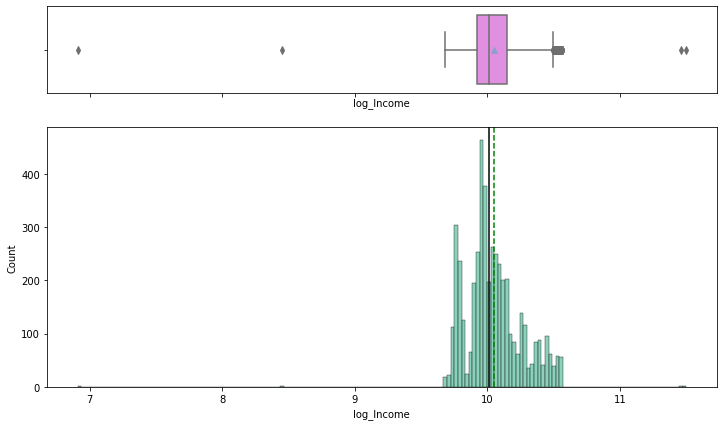

In [ ]:
histogram_boxplot(tourismDf,'log_Income')

In [ ]:
tourismDf.drop('log_Income', axis =1, inplace=True)

The log transformation doesn't seem to help in treating the outliers, we can consider keeping it as it is and probably do binning.

#### Handling Outliers in DurationOfPitch Data

##### Detecting outliers using box plot

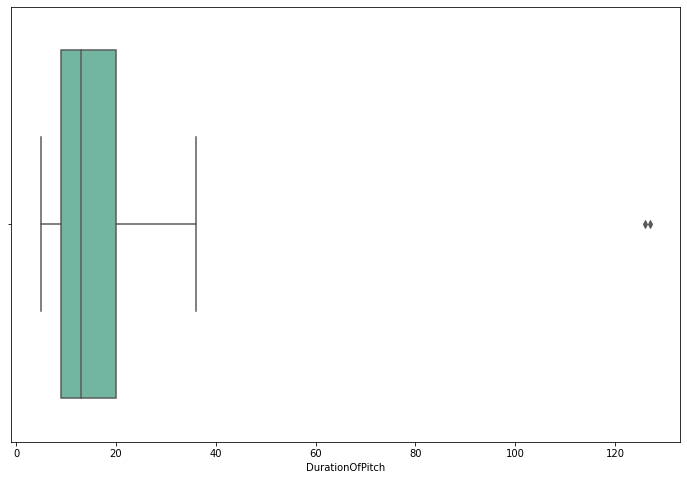

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=tourismDf,x='DurationOfPitch')
plt.show()

In [ ]:
tourismDf[tourismDf.DurationOfPitch>100]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


* Since there are only two outliers in the data, we can replace them with Mode
* When the data is skewed, it is good to consider using mode values for replacing the missing values.
* Even though there are only 2 outliers I am choosing to keep them since the dataset is small. However in production if the dataset is large, it will be a good idea to drop these two records.

In [ ]:
tourismDf.loc[(tourismDf.DurationOfPitch > 100),['DurationOfPitch']] = tourismDf.DurationOfPitch.mode()
tourismDf.loc[tourismDf['DurationOfPitch'] > 100]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


#### Handling Outliers for Occupation

In [ ]:
tourismDf.Occupation.value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

There are only two outliers in the Occupation type, the data may be correct, since the data set is small I am choosing to keep it as it is.

### Missing Value Treatment

#### Heatmap of Missing Data

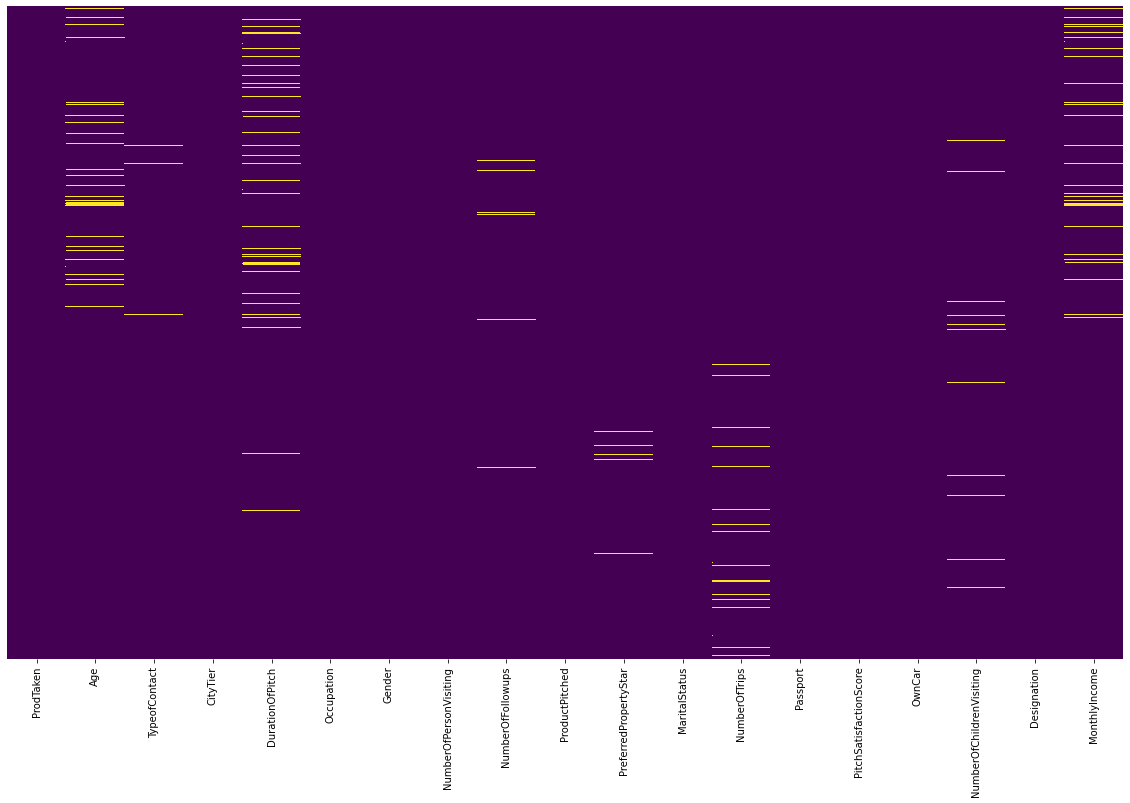

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(tourismDf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

- The above heatmap of missing data shows that the data is missing at random in some of the columns.
- Let us consider imputing the missing values using median for continuous variables and most frequent value for categorical variables.

In [ ]:
# round((tourismDf.isnull().sum()*100)/len(tourismDf),2).sort_values()
tourismDf.isnull().sum().sort_values()

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
Designation                   0
NumberOfPersonVisiting        0
ProductPitched                0
Occupation                    0
CityTier                      0
Gender                        0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             253
dtype: int64

* `PreferredPropertyStar` has 26 missing values
* `NumberOfFollowups` has 45 missing values
* `NumberOfChildrenVisiting` has 66 missing values
* `NumberOfTrips` has 140 missing values
* `MonthlyIncome` has 233 missing values
* `DurationOfPitch` has 251 missing values
* `Age` has 468 missing values

Let us start with the column that has least number of missing values

#### DurationOfPitch

In [ ]:
tourismDf[tourismDf.DurationOfPitch.isna()].head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
46,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,NaN
76,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,NaN
84,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN
103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0


In [ ]:
tourismDf.DurationOfPitch = tourismDf.DurationOfPitch.fillna(tourismDf.DurationOfPitch.mean())
tourismDf.DurationOfPitch.isna().sum()

0

#### TypeofContact Field

In [ ]:
tourismDf.TypeofContact.unique()

['Self Enquiry', 'Company Invited', NaN]
Categories (2, object): ['Self Enquiry', 'Company Invited']

In [ ]:
tourismDf.TypeofContact.isna().sum()

25

There are 25 NaN values in the column, let us figure out how to replace these missing values.

In [ ]:
tourismDf.TypeofContact.value_counts(normalize=True)

Self Enquiry       0.708205
Company Invited    0.291795
Name: TypeofContact, dtype: float64

Since a majority of the customers have come through self inquiry, let us replace the missing values with 'Self Enquiry'

In [ ]:
tourismDf.TypeofContact = tourismDf.TypeofContact.fillna('Self Enquiry')
tourismDf.TypeofContact.isna().sum()

0

#### PreferredPropertyStar Field

In [ ]:
tourismDf.PreferredPropertyStar.unique()

[3.0, 4.0, 5.0, NaN]
Categories (3, float64): [3.0, 4.0, 5.0]

In [ ]:
tourismDf.PreferredPropertyStar.isna().sum()

26

There are 26 missing values in the column `PreferredPropertyStar`, let us figure out how to replace these missing values.

In [ ]:
tourismDf.PreferredPropertyStar.value_counts(normalize=True)

3.0    0.615590
5.0    0.196627
4.0    0.187783
Name: PreferredPropertyStar, dtype: float64

Since a majority of the customers prefer 3 star property, let us replace the missing values with 3

In [ ]:
tourismDf.PreferredPropertyStar = tourismDf.PreferredPropertyStar.fillna(3)
tourismDf.PreferredPropertyStar.isna().sum()

0

In [ ]:
tourismDf.PreferredPropertyStar.unique()

[3.0, 4.0, 5.0]
Categories (3, float64): [3.0, 4.0, 5.0]

In [ ]:
tourismDf.PreferredPropertyStar = tourismDf.PreferredPropertyStar.astype('int64')

Since the property star has only integer values, let us convert the type from float to int for better interpretation.

#### NumberOfFollowups field

In [ ]:
tourismDf[tourismDf.NumberOfFollowups.isna()].head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4,Married,7.0,0,4,1,1.0,Manager,19941.0


In [ ]:
tourismDf['NumberOfFollowups']=tourismDf.groupby(['TypeofContact','Occupation','CityTier','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar','Designation'])['NumberOfFollowups'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfFollowups.isna().sum()

3

In [ ]:
tourismDf['NumberOfFollowups']=tourismDf.groupby(['TypeofContact','Occupation','CityTier','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar','Designation'])['NumberOfFollowups'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfFollowups.isna().sum()

3

In [ ]:
tourismDf[tourismDf.NumberOfFollowups.isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
881,0,32.0,Company Invited,1,8.0,Salaried,Female,2,NaN,Deluxe,3,Single,5.0,1,5,1,1.0,Manager,19998.0
1244,0,30.0,Company Invited,1,8.0,Large Business,Female,3,NaN,Basic,5,Single,1.0,0,3,0,1.0,Executive,19968.0
2351,0,32.0,Company Invited,1,8.0,Salaried,Female,2,NaN,Deluxe,3,Single,5.0,1,5,1,0.0,Manager,19998.0


In [ ]:
tourismDf['NumberOfFollowups']=tourismDf.groupby(['TypeofContact','CityTier','Gender'])['NumberOfFollowups'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfFollowups.isna().sum()

0

In [ ]:
tourismDf.NumberOfFollowups = tourismDf.NumberOfFollowups.astype('int64')

#### NumberOfChildrenVisiting field

In [ ]:
tourismDf['NumberOfChildrenVisiting'] = tourismDf.groupby(['TypeofContact','Occupation','CityTier','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar','Designation'])['NumberOfChildrenVisiting'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfChildrenVisiting.isna().sum()

12

In [ ]:
tourismDf['NumberOfChildrenVisiting']=tourismDf.groupby(['Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar'])['NumberOfChildrenVisiting'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfChildrenVisiting.isna().sum()

7

In [ ]:
tourismDf.NumberOfChildrenVisiting.mean()

1.1834665027658267

In [ ]:
tourismDf['NumberOfChildrenVisiting'] = tourismDf.NumberOfChildrenVisiting.fillna(tourismDf.NumberOfChildrenVisiting.mean())
tourismDf.NumberOfChildrenVisiting.isna().sum()

0

In [ ]:
tourismDf['NumberOfChildrenVisiting']  = tourismDf['NumberOfChildrenVisiting'].astype(int)

In [ ]:
tourismDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   int64   
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   int64   
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
tourismDf['NumberOfChildrenVisiting'].unique()

array([0, 2, 1, 3])

In [ ]:
tourismDf[tourismDf.NumberOfChildrenVisiting >= tourismDf.NumberOfPersonVisiting]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [ ]:
tourismDf.loc[(tourismDf.NumberOfChildrenVisiting >= tourismDf.NumberOfPersonVisiting),['NumberOfChildrenVisiting']] = 0
tourismDf.loc[(tourismDf.NumberOfChildrenVisiting >= tourismDf.NumberOfPersonVisiting)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


#### NumberOfTrips field

In [ ]:
tourismDf['NumberOfTrips']=tourismDf.groupby(['TypeofContact','Occupation','CityTier','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar','Designation'])['NumberOfTrips'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfTrips.isna().sum()

0

In [ ]:
tourismDf['NumberOfTrips']=tourismDf.groupby(['TypeofContact','Occupation','CityTier','Gender','ProductPitched','MaritalStatus','PreferredPropertyStar','Passport','OwnCar','Designation'])['NumberOfTrips'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfTrips.isna().sum()

0

In [ ]:
tourismDf['NumberOfTrips']=tourismDf.groupby(['TypeofContact','CityTier','Gender'])['NumberOfTrips'].apply(lambda x:x.fillna(x.median()))
tourismDf.NumberOfTrips.isna().sum()

0

In [ ]:
tourismDf.NumberOfTrips = tourismDf.NumberOfTrips.astype(int)

#### Age Field

In [ ]:
tourismDf.Age.isna().sum()

226

In [ ]:
tourismDf.groupby(['NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar'])['Age'].median()

NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar
1              0         1                       0         33.0
                                                 1         39.0
                         2                       0         37.0
                                                 1         37.0
                         3                       0         36.0
                                                           ... 
22             1         3                       1          NaN
                         4                       0          NaN
                                                 1          NaN
                         5                       0          NaN
                                                 1          NaN
Name: Age, Length: 240, dtype: float64

In [ ]:
tourismDf['Age']=tourismDf.groupby(['NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar'])['Age'].apply(lambda x:x.fillna(x.median()))

In [ ]:
tourismDf['Age']=tourismDf.Age.fillna(tourismDf.Age.median())

In [ ]:
tourismDf.Age.unique()

array([41. , 49. , 37. , 33. , 40. , 32. , 59. , 30. , 38. , 36. , 35. ,
       42. , 31. , 34. , 28. , 29. , 22. , 53. , 41.5, 21. , 44. , 46. ,
       39. , 24. , 43. , 50. , 27. , 26. , 48. , 36.5, 40.5, 55. , 45. ,
       56. , 23. , 51. , 54. , 58. , 20. , 25. , 19. , 57. , 52. , 47. ,
       18. , 50.5, 42.5, 60. , 43.5, 33.5, 34.5, 32.5, 61. ])

In [ ]:
tourismDf.Age.describe()

count    4888.000000
mean       37.541633
std         9.134371
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [ ]:
tourismDf.Age = tourismDf.Age.astype(int)

Convert the datatype of Age column from float to int for better interpretation

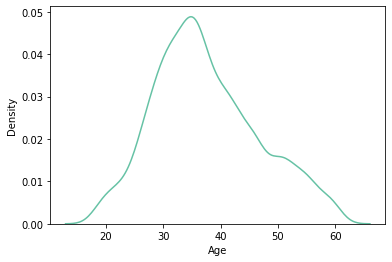

In [ ]:
sns.kdeplot(data=tourismDf,x='Age')
plt.show()

**Observations:**

* There are more people in the Age group 30 to 40. Let us consider bining the Age carefully see how it works.

#### Binning Age Field

In [ ]:
tourismDf['Agebin'] = pd.cut(tourismDf['Age'], bins = [15,25, 30, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [ ]:
tourismDf.Agebin.value_counts()

31-40    2126
41-50    1096
26-30     770
51-70     549
15-25     347
Name: Agebin, dtype: int64

#### MontlyIncome

In [ ]:
tourismDf["MonthlyIncome"]=tourismDf.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

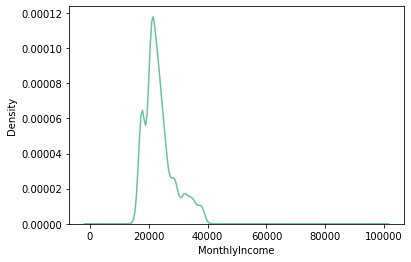

In [ ]:
sns.kdeplot(data=tourismDf,x='MonthlyIncome')
plt.show()

In [ ]:
tourismDf.MonthlyIncome.describe()

count     4888.000000
mean     23543.855769
std       5267.651455
min       1000.000000
25%      20438.250000
50%      22393.000000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

#### Binning MonthlyIncome Field

Adding a new column, converting the MonthlyIncome value into bins to understand the customers in different income range

In [ ]:
tourismDf['Incomebin'] = pd.cut(tourismDf['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,50000,100000], labels = ['Below15K', '15K-20k', '20K-25K', '25K-30K','30K-35K','35K-50K','50K-100K'])

In [ ]:
tourismDf.Incomebin.value_counts()

20K-25K     2490
15K-20k     1038
25K-30K      768
30K-35K      382
35K-50K      206
50K-100K       2
Below15K       2
Name: Incomebin, dtype: int64

In [ ]:
tourismDf.Agebin.unique()

['41-50', '31-40', '51-70', '26-30', '15-25']
Categories (5, object): ['15-25' < '26-30' < '31-40' < '41-50' < '51-70']

### One Hot Encoding and Replacing Structure

I did not use DropFirst = True in get_dummies function, as this may cause missing interpretations when we are checking the importance metrics, as it drops the first column after creating dummies.

## Customer-Level Analysis

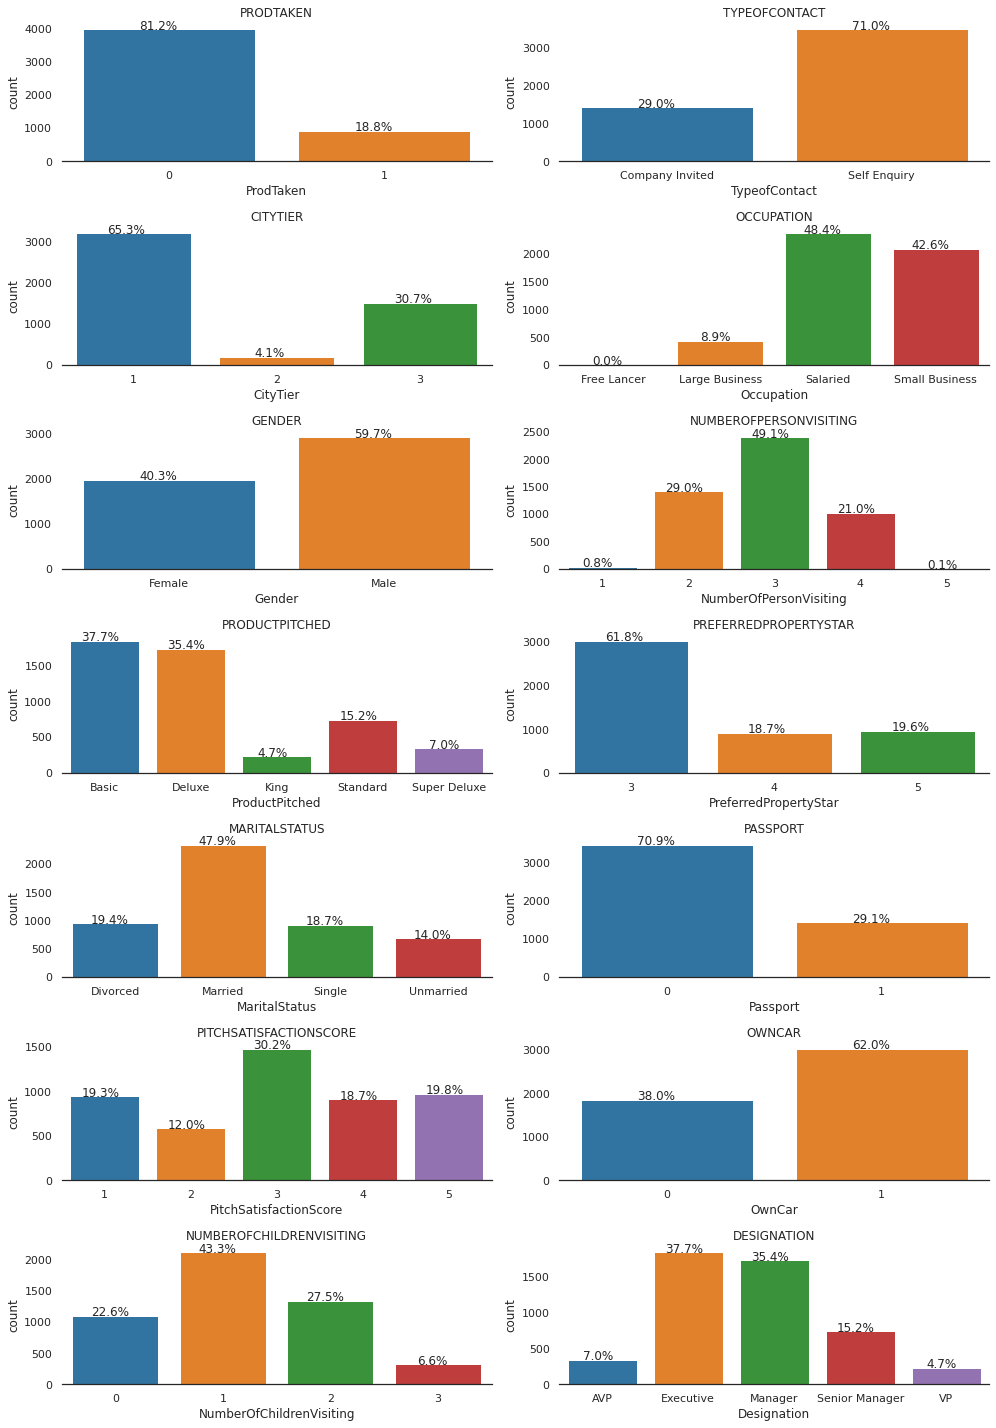

In [ ]:
# Making a list of all categorical variables
cat_columns = ['ProdTaken','TypeofContact','CityTier','Occupation',
               'Gender','NumberOfPersonVisiting','ProductPitched','PreferredPropertyStar','MaritalStatus',
               'Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']
title=['ProdTaken','TypeofContact','CityTier','Occupation',
               'Gender','NumberOfPersonVisiting','ProductPitched','PreferredPropertyStar','MaritalStatus',
               'Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
for i, variable in enumerate(cat_columns):
                     plt.subplot(7,2,i+1)
                     order = tourismDf[variable].value_counts(ascending=False).index   
                     sns.set_palette('tab10')
                     ax=sns.countplot(x=tourismDf[variable], data=tourismDf)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(tourismDf[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())
                                     

**Observations**

* ~29.4 % customers are single.
* ~40% customers are undergrad.
* ~9.6% bought a personal loan from the bank.
* ~10.4 % customers have a securities account with the bank
* ~6.1 % customer have a CD account.
* ~60% customers use internet banking.
* 29.4% customers have credit cards.
* ~ 75 % of customers are in range of 31- 60.

## <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are total of 20 columns and 4888 rows in the dataset.
- There are missing values in the columns `Age`, `TypeofContact`,`DurationOfPitch`, `NumberOfFollowups`,`PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`,`MonthlyIncome`.
- Most of the data-types are either **int64**,**float64** or **object** type.
- Experience had negative values and treated by converting them to positive values
- Missing value treatment has been done by replacing missing values with the mean for continuous variables and mode for the categorical variables.
- Outlier treatment has been done for DurationOfPitch and Occupation.
- Missing value treatment for `MonthlyIncome` field did not provide good results so I considered binning the values. Similarly `Age` field also has been binned for better interpretation.

**Observations from EDA:**

* ***Age*** is quantitative, range of people having bank account is from minimum age of 23 to Maimum age of 67.
* ***Experience*** is quantitative, it has some negative values, we have to do some data preprocessing to correct this data. Minimum experience is 0 which means no experience and maximum experience is 43 years.
* ***Income*** is quantitative, discrete range of values from minimum of 8K dollars to a maximum on 224K dollars, median income is around 64K dollars.
* ***Zipcode*** is qualitative, categorical data. Does not have any significance here, it will be more meanigful if we can determine the region for each zipcode and convert this into a categorical data. People living in Sanoma, Shasta, San Luis, Contra counties are more likely to buy a personal loan when compared to customers living in other counties.
* Customer's ***Family*** is categorical data, having a finite set of values. Size range is from 1 to 4.
* ***CCVAvg*** is quantitative, continuous variable havgin Min average spending on credit cards per month of zero dollars and maximum of 10K dollars.
* ***Education*** is qualitative, categorical data. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* ***Mortgage*** is quantitative, continuous data,Q3 value is 101K dollars and maximum mortgage availed is 635K dollars.
* ***Personal_Loan*** - **target variable**, it is qualitative, binary(0/1), categorical data. If the customer had accepted the personal loan offered in the last campaign then 1 else 0.
* ***Securities_Account*** it is qualitative, binary(0/1), categorical data. If the customer has securities account in AllLife bank then 1 else 0.
* ***CD_Account*** it is qualitative, binary(0/1), categorical data. If the customer has certificate of deposit (CD) account in AllLife bank then 1 else 0.
* ***Online*** it is qualitative, binary(0/1), categorical data. If the customer uses internet banking facility provided by in AllLife bank then 1 else 0.
* ***CreditCard*** it is qualitative, binary(0/1), categorical data. If the customer holds a credit card issued by any other bank other than AllLife bank then 1 else 0.

# Prepare the data

#### With outliers and missing values

In [ ]:
tourismDfWithOutliers = tourismDf.copy()

## Model Building - Approach
1. Data preparation
2. Split the data into the train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Data Preparation

In [ ]:
# tourismDfClean = tourismDf.drop(['Agebin','Incomebin'], axis=1, inplace=False)   # with outliers for income, missing data removed
tourismDfWithBin = tourismDf.drop(['Age','MonthlyIncome'], axis=1, inplace=False)  # With Binning

In [ ]:
# print(creditData.checking_balance.value_counts())
# print(creditData.credit_history.value_counts())
# print(creditData.purpose.value_counts())
# print(creditData.savings_balance.value_counts())
# print(creditData.employment_duration.value_counts())
# print(creditData.other_credit.value_counts())
# print(creditData.housing.value_counts())
# print(creditData.job.value_counts())
# print(creditData.phone.value_counts())

In [ ]:
replaceStruct = {
                "Agebin": { "15-25": 1, "26-30": 2 ,"31-40": 3 ,"41-50": 4,"51-70": 5 },
                "Incomebin": { "Below15K": 1, "15K-20k":2 , "20K-25K": 3, "25K-30K": 4,"30K-35K": 5,"35K-50K": 6,"50K-100K": 7 }
                }
# oneHotCols=["TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus","PitchSatisfactionScore","OwnCar","Designation","Passport","Agebin","Incomebin"]
oneHotCols=["TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus","PitchSatisfactionScore","Designation","OwnCar","CityTier","Passport"]

# Keep Passport and CityTier as category fields

In [ ]:
tourismDfWithBin=tourismDfWithBin.replace(replaceStruct)
tourismDfWithBin=pd.get_dummies(tourismDfWithBin, columns=oneHotCols)
tourismDfWithBin.head(10)

,ProdTaken,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,Agebin,Incomebin,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,PitchSatisfactionScore_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,OwnCar_0,OwnCar_1,CityTier_1,CityTier_2,CityTier_3,Passport_0,Passport_1
0,1,6.0,3,3,3,1,0,4,3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
1,0,14.0,3,4,4,2,2,4,3,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0
2,1,8.0,3,4,3,7,0,3,2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
3,0,9.0,2,3,3,2,1,3,2,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
4,0,8.0,2,3,4,1,0,3,2,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
5,0,8.0,3,3,3,1,1,3,2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
6,0,9.0,2,2,5,5,1,5,2,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
7,0,30.0,3,3,3,2,1,2,2,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
8,0,29.0,2,4,3,1,0,3,3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0
9,0,33.0,3,3,3,7,0,3,3,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0


In [ ]:
# tourismDfClean=pd.get_dummies(tourismDfClean, columns=oneHotCols)
# tourismDfClean.head(10)

## Split Data

In [ ]:
X = tourismDfWithBin.drop('ProdTaken',axis=1)
y = tourismDfWithBin['ProdTaken'] 

In [ ]:
# Use the other dataframe with 

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3177, 42) (1711, 42)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [ ]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.811806
1    0.188194
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a person doesn't have diabetes and the person has diabetes.
2. Predicting a person has diabetes, and the person doesn't have diabetes.

### Which case is more important? 
* Predicting a person doesn't have diabetes, and the person has diabetes.

### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes but the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

**Let's define a function to provide recall scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def add_score_model(score):
  '''add score of modelto list'''
  df_cols = ['score', 'train' , 'test']
  dfScores = pd.DataFrame(columns=df_cols)

  new_row = {'score':'Accuracy', 'train':score[0], 'test':score[1]}
  #append row to the dataframe
  dfScores = dfScores.append(new_row, ignore_index=True)
  new_row = {'score':'Recall', 'train':score[2], 'test':score[3]}
  #append row to the dataframe
  dfScores = dfScores.append(new_row, ignore_index=True)

  new_row = {'score':'Precision', 'train':score[4], 'test':score[5]}
  #append row to the dataframe
  dfScores = dfScores.append(new_row, ignore_index=True)
  new_row = {'score':'F1', 'train':score[6], 'test':score[7]}
  #append row to the dataframe
  dfScores = dfScores.append(new_row, ignore_index=True)
  return dfScores

In [ ]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='YlOrRd',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [ ]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          # display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
          df = add_score_model(score_list)
          # display(df)
          display(pd.DataFrame.from_records(df))
    # return score_list # returning the list with train and test scores

## Bagging

### Decision Tree

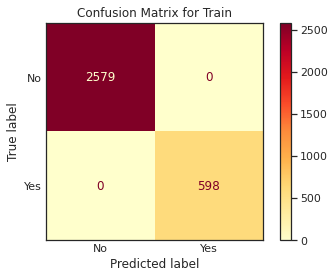

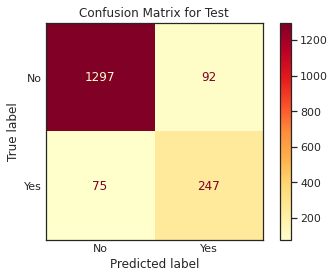

,score,train,test
0,Accuracy,1.0,0.902396
1,Recall,1.0,0.767081
2,Precision,1.0,0.728614
3,F1,1.0,0.747352


In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
#Creating confusion matrix
get_metrics_score(d_tree,X_train,X_test,y_train,y_test,True)

* The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is very low i.e. only 58%.

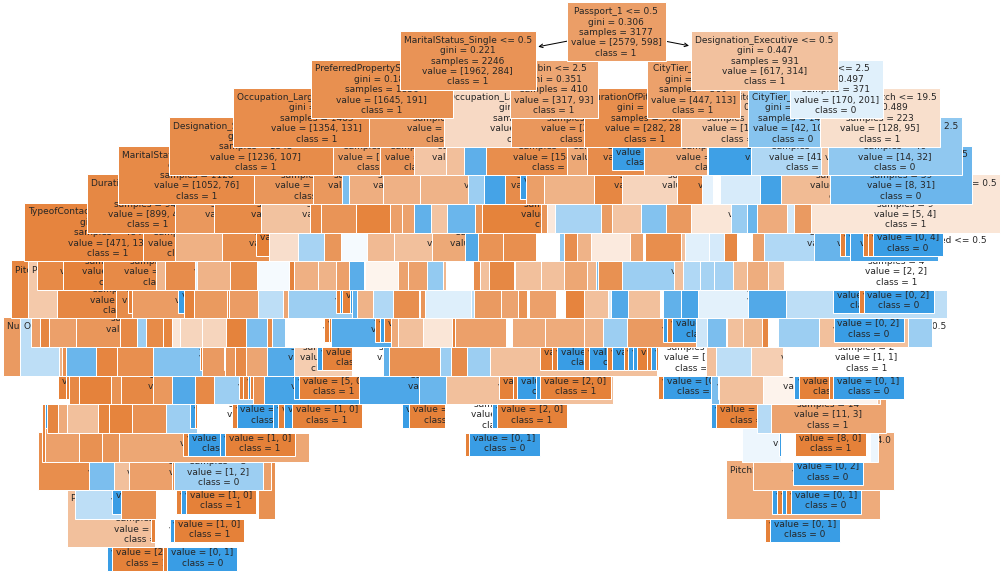

In [ ]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(d_tree,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Random Forest

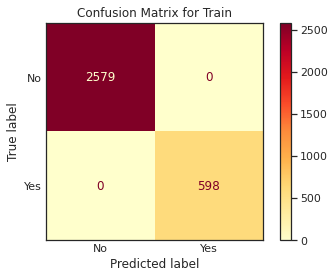

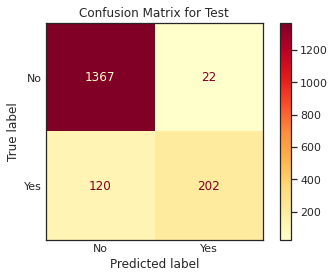

,score,train,test
0,Accuracy,1.0,0.917008
1,Recall,1.0,0.627329
2,Precision,1.0,0.901786
3,F1,1.0,0.739927


In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)
#Creating confusion matrix
get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

### Bagging Classifier

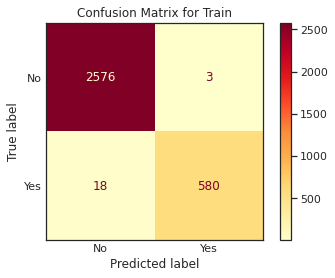

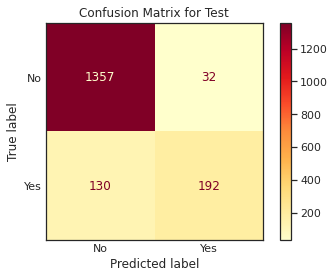

,score,train,test
0,Accuracy,0.993390,0.905319
1,Recall,0.969900,0.596273
2,Precision,0.994854,0.857143
3,F1,0.982218,0.703297


In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)

bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier giving a similar performance as random forest.
* It is also overfitting the training data and lower test recall than decision trees.

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [ ]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='newton-cg',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='newton-cg'),
                  random_state=1)

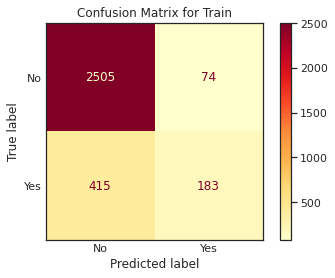

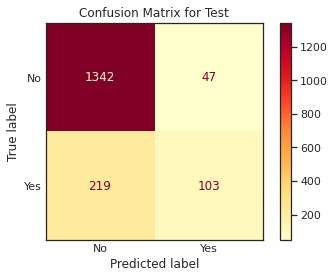

,score,train,test
0,Accuracy,0.846081,0.844535
1,Recall,0.306020,0.319876
2,Precision,0.712062,0.686667
3,F1,0.428070,0.436441


In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(bagging_lr,X_train,X_test,y_train,y_test)
bagging_lr_model_train_perf=model_performance_classification_sklearn(bagging_lr,X_train,y_train)
bagging_lr_model_test_perf=model_performance_classification_sklearn(bagging_lr,X_test,y_test)

### Tuning Decision Tree

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

parammetersdecisiontree = {
    'max_depth': [2, 3, 5, 7, 9, 12],
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'criterion': ["gini", "entropy"],
    'class_weight' : [{1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.8, 0:0.2}, {1:0.5, 0:0.5},'balanced']
    ,'max_leaf_nodes' : [2, 3, 5, 10,15]
    ,'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
    #  "splitter": ["best", "random"], #Added this extra TODO
    # "min_impurity_decrease": [0.000001, 0.00001, 0.0001], #Added this extra TODO
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parammetersdecisiontree, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

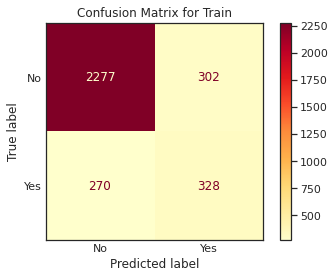

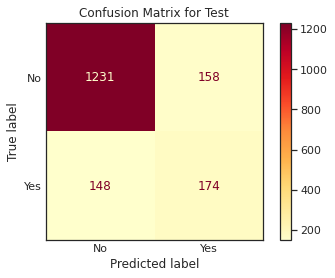

,score,train,test
0,Accuracy,0.819956,0.821157
1,Recall,0.548495,0.540373
2,Precision,0.520635,0.524096
3,F1,0.534202,0.532110


In [ ]:
#Calculating different metrics
get_metrics_score(dtree_estimator,X_train,X_test,y_train,y_test)
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)


* The test recall has increased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

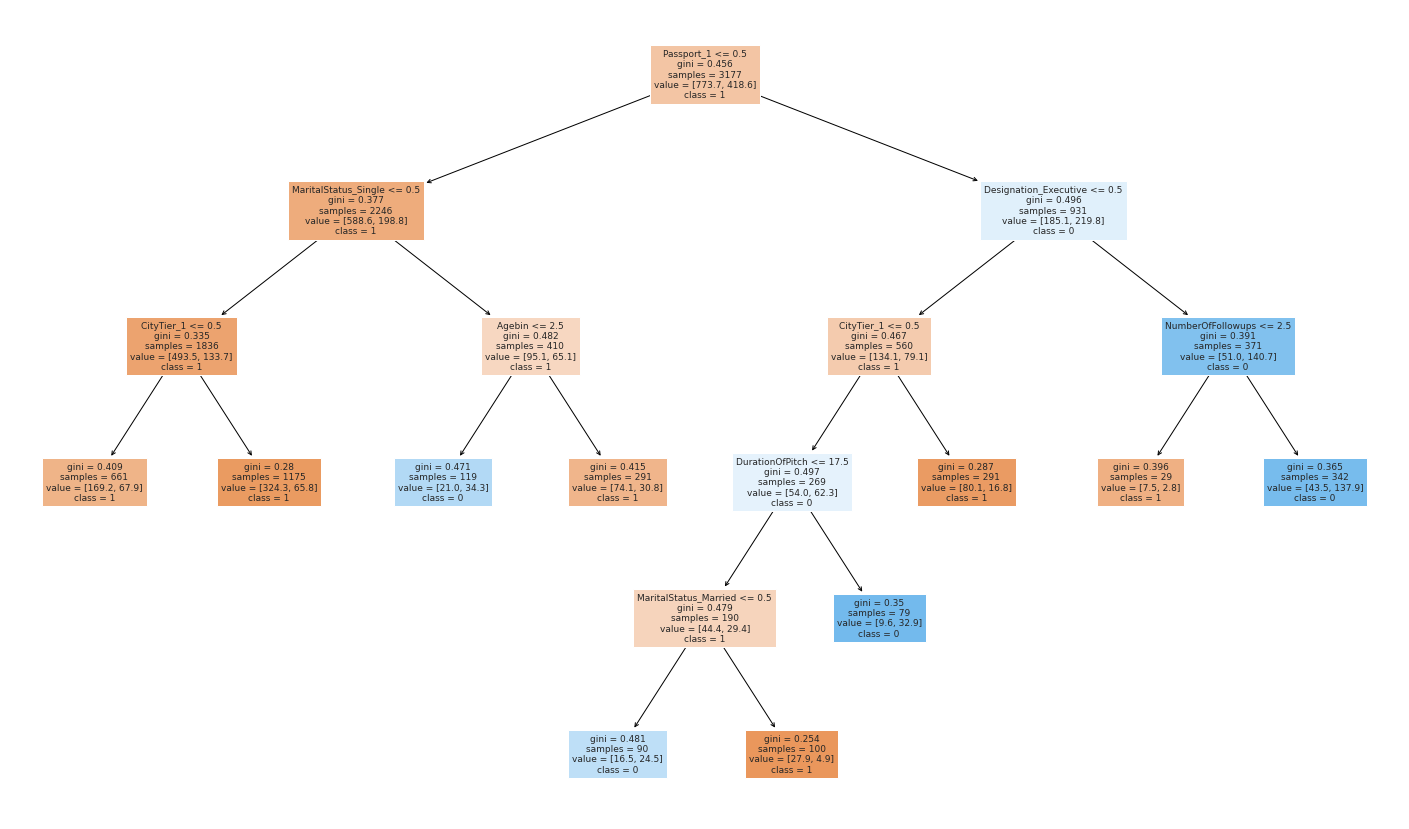

In [ ]:
plt.figure(figsize=(25,15))
feature_names = X_train.columns
out = tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Tuning Random Forest

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

parametersrf = { "max_depth":[5,7,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": [0.7,0.9,'log2','auto'],
                "class_weight" : [{1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.8, 0:0.2}, {1:0.5, 0:0.5},'balanced'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parametersrf, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parametersrf, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=0.9,
                       max_samples=0.3, min_samples_leaf=5, n_estimators=150,
                       random_state=1)

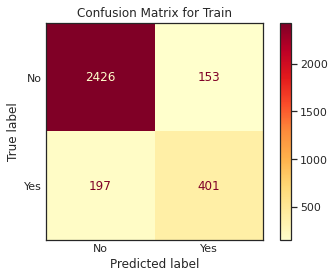

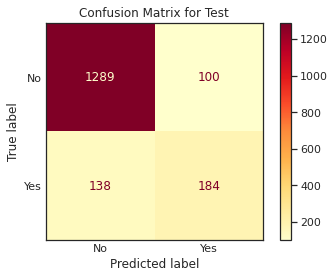

,score,train,test
0,Accuracy,0.889833,0.860900
1,Recall,0.670569,0.571429
2,Precision,0.723827,0.647887
3,F1,0.696181,0.607261


In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
# print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
# print("Testing performance:\n",rf_tuned_model_test_perf)

# rf_tuned_score=
get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
# add_score_model(rf_tuned_score)

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

### Tuning Bagging Classifier

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [100,200,300,400,500],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=500,
                  random_state=1)

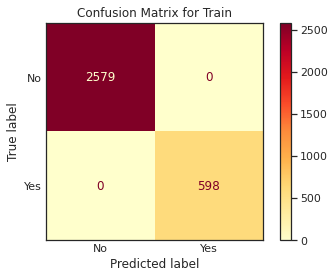

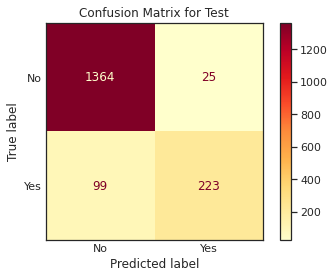

,score,train,test
0,Accuracy,1.0,0.927528
1,Recall,1.0,0.692547
2,Precision,1.0,0.899194
3,F1,1.0,0.782456


In [ ]:
# Create confusion metrics and print scores
get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)

* Surprisingly, the test recall has decreased after hyperparameter tuning and the  model is still overfitting the training data.
* The confusion matrix shows that the model is not good at identifying patients who are at risk of diabetes.

## Comparing all the models

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]

In [ ]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,1.0,0.819956,1.0,0.889833,0.993390,1.0
Recall,1.0,0.548495,1.0,0.670569,0.969900,1.0
Precision,1.0,0.520635,1.0,0.723827,0.994854,1.0
F1,1.0,0.534202,1.0,0.696181,0.982218,1.0


In [ ]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,0.902396,0.821157,0.917008,0.860900,0.905319,0.927528
Recall,0.767081,0.540373,0.627329,0.571429,0.596273,0.692547
Precision,0.728614,0.524096,0.901786,0.647887,0.857143,0.899194
F1,0.747352,0.532110,0.739927,0.607261,0.703297,0.782456


* A tuned decision tree is the best model for our data as it has the highest test recall and giving a generalized performance as compared to other models.

### Feature importance of tuned decision tree

In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Passport_1 <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- CityTier_1 <= 0.50
|   |   |   |--- weights: [169.20, 67.90] class: 0
|   |   |--- CityTier_1 >  0.50
|   |   |   |--- weights: [324.30, 65.80] class: 0
|   |--- MaritalStatus_Single >  0.50
|   |   |--- Agebin <= 2.50
|   |   |   |--- weights: [21.00, 34.30] class: 1
|   |   |--- Agebin >  2.50
|   |   |   |--- weights: [74.10, 30.80] class: 0
|--- Passport_1 >  0.50
|   |--- Designation_Executive <= 0.50
|   |   |--- CityTier_1 <= 0.50
|   |   |   |--- DurationOfPitch <= 17.50
|   |   |   |   |--- MaritalStatus_Married <= 0.50
|   |   |   |   |   |--- weights: [16.50, 24.50] class: 1
|   |   |   |   |--- MaritalStatus_Married >  0.50
|   |   |   |   |   |--- weights: [27.90, 4.90] class: 0
|   |   |   |--- DurationOfPitch >  17.50
|   |   |   |   |--- weights: [9.60, 32.90] class: 1
|   |   |--- CityTier_1 >  0.50
|   |   |   |--- weights: [80.10, 16.80] class: 0
|   |--- Designation_Executive >  0.50
|   |   

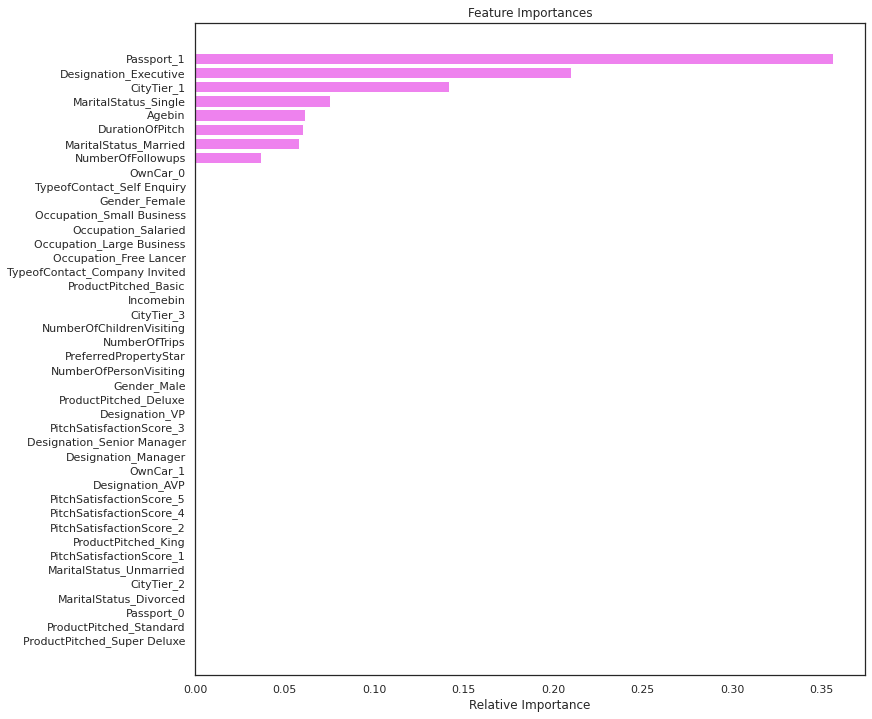

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We can see that Glucose concentration is the most important feature followed by Age and BMI.
* The tuned decision tree is using only three variables to separate the two classes. 

## AdaBoost Classifier

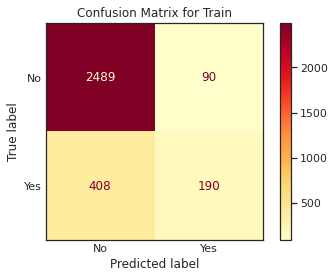

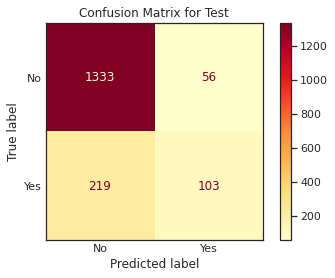

,score,train,test
0,Accuracy,0.843248,0.839275
1,Recall,0.317726,0.319876
2,Precision,0.678571,0.647799
3,F1,0.432802,0.428274


In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

get_metrics_score(ab_classifier,X_train,X_test,y_train,y_test)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(100,200,300),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.7000000000000001, n_estimators=100,
                   random_state=1)

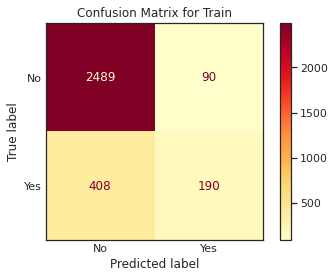

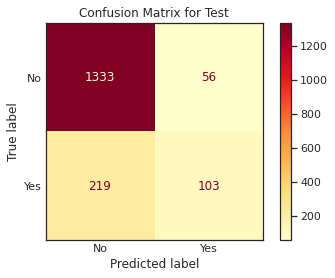

,score,train,test
0,Accuracy,0.843248,0.839275
1,Recall,0.317726,0.319876
2,Precision,0.678571,0.647799
3,F1,0.432802,0.428274


In [ ]:
#Creating confusion matrix and print scores
get_metrics_score(ab_classifier,X_train,X_test,y_train,y_test)

#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

## Gradient Boosting Classifier

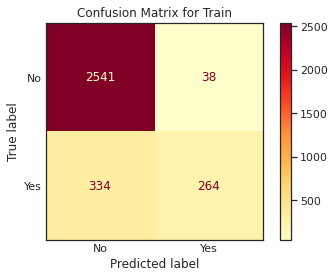

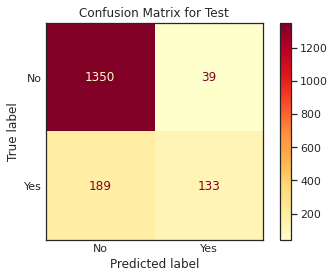

,score,train,test
0,Accuracy,0.882908,0.866745
1,Recall,0.441472,0.413043
2,Precision,0.874172,0.773256
3,F1,0.586667,0.538462


In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)
#Creating confusion matrix and print scores
get_metrics_score(gb_classifier,X_train,X_test,y_train,y_test)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is overfitting the training data.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

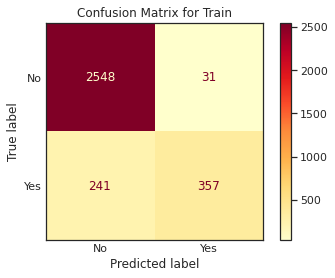

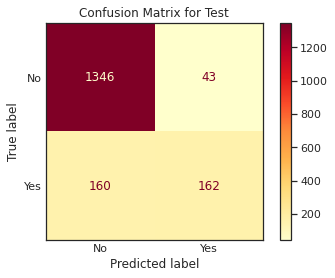

,score,train,test
0,Accuracy,0.914385,0.881356
1,Recall,0.596990,0.503106
2,Precision,0.920103,0.790244
3,F1,0.724138,0.614801


In [ ]:
#Creating confusion matrix and print scores
get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test)

#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning.

## XGBoost Classifier

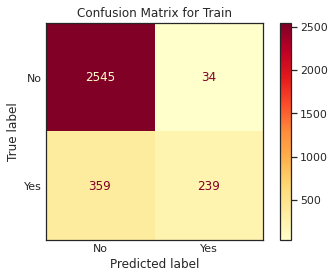

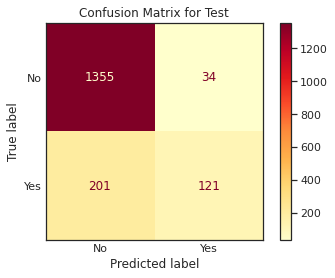

,score,train,test
0,Accuracy,0.876298,0.862653
1,Recall,0.399666,0.375776
2,Precision,0.875458,0.780645
3,F1,0.548794,0.507338


In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Creating confusion matrix and print scores
get_metrics_score(xgb_classifier,X_train,X_test,y_train,y_test)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,300,500],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.

xgb_tuned.fit(X_train, y_train)

In [ ]:
#Creating confusion matrix and print scores
get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)

#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

## Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
#Creating confusion matrix and print scores
get_metrics_score(stacking_classifier,X_train,X_test,y_train,y_test)

#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.
* The confusion matrix shows that the model can identify the majority of premium quality wines but it is better at identifying non-premium quality wines.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

* The majority of the models are overfitting the training data in terms of f1-score.
* The bagging classifier is giving the highest f1-score on the test data but is overfitting the training data.
* The tuned random forest has given the second-highest test f1-score and is giving a more generalized performance as compared to the bagging classifier. 

### Feature importance of Tuned Random Forest

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Alcohol is the most important feature in identifying premium quality wine followed by sulfates and volatile acidity.

In [ ]:
# # So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
# fig, ax = plt.subplots(figsize=(8, 6))
# y_pred=rf_tuned.predict(X_test)
# ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
# ax.set_xlabel('Observed')
# ax.set_ylabel('Predicted')
# ax.set_title("Observed vs Predicted")
# plt.grid()
# plt.show()

## Conclusion
* We can see that three variables - Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Once the desired performance is achieved from the model, the company can use it to predict the risk factor of diabetes in new patients. This would help to reduce the cost and increase the efficiency of the process.
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problem.
* As per the decision tree business rules:
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.
* Based on the above analysis, we can say that:
    - Middle-aged to older women has a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
    - Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 